# Data Mining Approach for Dry Bean Seeds Classification (Revisi Proses)

## Kelompok 5:
1. Arief Rahman (20/455441/PA/19656)
2. Ferdiansyah Dwi Nurcahyo (20/459265/PA/19926)
3. R.M. Garda Zhafir Soorjowiseso (20/45925/PA/19366)

## Data Acquisition

Akuisisi data diambil dari Dry Bean Dataset pada UCI Machine Learning Repository dengan link [https://https://archive.ics.uci.edu/dataset/602/dry+bean+dataset]. Dataset bersifat tabular numerik dan merupakan hasil *feature extraction* dari dataset *image* yang diakuisisi oleh Koklu dan Ozkan (2020) pada artikel *Multiclass classification of dry beans using computer vision and machine
learning techniques* (link: [https://www.sciencedirect.com/science/article/abs/pii/S0168169919311573?via%3Dihub])

In [1]:
!git clone https://github.com/arieeefrahman/dry_beans_dataset

fatal: destination path 'dry_beans_dataset' already exists and is not an empty directory.


In [2]:
!pip install pandas==2.2.1
!pip install matplotlib==3.8.3
!pip install openpyxl

  Using cached pandas-2.2.1-cp311-cp311-win_amd64.whl.metadata (19 kB)
Using cached pandas-2.2.1-cp311-cp311-win_amd64.whl (11.6 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.3.0 requires pandas<2.2.0, but you have pandas 2.2.1 which is incompatible.
sktime 0.27.0 requires pandas<2.2.0,>=1.1, but you have pandas 2.2.1 which is incompatible.


  Using cached matplotlib-3.8.3-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
Using cached matplotlib-3.8.3-cp311-cp311-win_amd64.whl (7.6 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.5
    Uninstalling matplotlib-3.7.5:
      Successfully uninstalled matplotlib-3.7.5


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.3.0 requires pandas<2.2.0, which is not installed.
seaborn 0.13.2 requires pandas>=1.2, which is not installed.
pycaret 3.3.0 requires matplotlib<3.8.0, but you have matplotlib 3.8.3 which is incompatible.


In [3]:
!pip install scikit-learn

In [4]:
!pip install imblearn

In [5]:
!pip install pycaret --user

  Using cached pandas-2.1.4-cp311-cp311-win_amd64.whl.metadata (18 kB)
  Using cached matplotlib-3.7.5-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
Using cached matplotlib-3.7.5-cp311-cp311-win_amd64.whl (7.5 MB)
Using cached pandas-2.1.4-cp311-cp311-win_amd64.whl (10.6 MB)


In [6]:
!pip install scipy==1.11.4

In [7]:
import scipy
scipy.__version__

'1.11.4'

In [8]:
!pip install seaborn

In [9]:
#import library yang dibutuhkan
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [10]:
#proses casting tipe data yang bersesuaian
column_np_int32 = [0, 6]
column_np_float64 = [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15]
column_categorical = [16]

#pembuatan dictionary untuk parameter dtypes
dtype_dict = {}
for column in column_np_int32:
  dtype_dict[column] = np.int32
for column in column_np_float64:
  dtype_dict[column] = np.float64
for column in column_categorical:
  dtype_dict[column] = str

#akuisisi data Excel
#File path pada GColab
#file_path = '/content/dry_beans_dataset/Dry_Bean_Dataset.xlsx'

#File path pada local computer
file_path = './dry_beans_dataset/Dry_Bean_Dataset.xlsx'

df = pd.read_excel(file_path,
                   sheet_name=0,
                   header=0,
                   dtype=dtype_dict,
                   decimal=',')

df.iloc[:, 16] = df.iloc[:, 16].astype('category')

#memisahkan fitur (X) dan target (y)
X = df[df.columns[[*np.arange(0, 16)]]]
y = df[df.columns[16]]

In [11]:
X.dtypes

Area                 int32
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int32
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
dtype: object

In [12]:
y.dtypes

dtype('O')

In [13]:
df.shape

(13611, 17)

## Data Exploration

### 3. Initial Data Examination

In [14]:
#Pengecekan data-data awal
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [15]:
#pengecekan data-data akhir
df.tail()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON
13610,42159,772.237,295.142741,182.204716,1.619841,0.786693,42600,231.686223,0.788962,0.989648,0.888380,0.784997,0.007001,0.001640,0.616221,0.998180,DERMASON


In [16]:
#pengecekan jumlah fitur dan records
df.shape

(13611, 17)

Dataset memiliki 17 kolom (16 fitur dan 1 target) dan 13611 records

### 4. Check for Duplicate Rows

In [17]:
df.duplicated().sum()

68

Terdapat 68 record yang memiliki 17 kolom sama persis dengan kolom lainnya.

In [18]:
df = df.drop_duplicates(keep='first',
                        inplace=False,
                        ignore_index=False)
df.shape

(13543, 17)

Dilakukan cleaning terhadap data duplikat yang menyebabkan jumlah record dataset menjadi


> n(baru) = n(lama) - n(duplikat)

> n(baru) = 13611 - 68 = 13543



### 5. Summary Statistics

In [19]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000
mean,53048.460385,854.993406,319.895602,202.365321,1.581075,0.750315,53767.986709,253.034094,0.749829,0.987152,0.873671,0.800352,0.006561,0.001719,0.644341,0.995078
std,29392.438324,214.722684,85.809260,45.051632,0.245245,0.091858,29844.248525,59.307709,0.048939,0.004650,0.059393,0.061464,0.001130,0.000595,0.098653,0.004347
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36282.500000,703.230000,253.086806,175.886357,1.430662,0.715144,36673.000000,214.933277,0.718735,0.985678,0.833410,0.763228,0.005893,0.001158,0.582517,0.993720
50%,44580.000000,793.896000,296.404589,192.491117,1.549860,0.763997,45122.000000,238.245711,0.759903,0.988288,0.883490,0.801514,0.006643,0.001700,0.642424,0.996393
75%,61382.000000,977.146500,376.312489,217.245403,1.703916,0.809671,62360.000000,279.560351,0.786849,0.990019,0.917031,0.834470,0.007270,0.002173,0.696341,0.997891
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


### 6. Identify Missing Values

In [20]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

Berdasarkan sumber dataset dari UCI Machine Learning Repository, sudah terdapat dokumentasi yang menjelaskan bahwa dataset ini tidak memiliki nilai null sehingga tidak perlu dilakukan pemrosesan lebih lanjut.

### 7. Check for Outliers

Identifikasi data outlier dilakukan dengan metode Interquartile Range (IQR) mengikuti metode yang digunakan dalam artikel referensi. Konstanta yang digunakan 1.5.

Rumus IQR yang digunakan adalah

> df_non_iqr = (df - 1.5\*IQR \|| df + 1.5\*IQR)

Masing-masing varietas dry bean memiliki nilai wajar atribut yang berbeda-beda. Oleh karena itu, IQR dilakukan per tiap varietas dry bean / class

In [21]:
# Pisahkan data berdasarkan kelas
grouped_data = df.groupby('Class')

# Fungsi untuk mendeteksi outlier menggunakan metode IQR
def detect_outliers(group):
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    is_not_outliers = group[(group > lower_bound) & (group < upper_bound)]
    return is_not_outliers

# Deteksi outlier untuk tiap kelas menggunakan fungsi IQR
not_outliers_group = grouped_data.apply(detect_outliers)
df_not_outlier = not_outliers_group.reset_index().drop(columns=['level_1'])
df_not_outlier = df_not_outlier.dropna(how='any',
                                       axis=0,
                                       ignore_index=False)

In [22]:
df_not_outlier.shape

(11878, 17)

#### 8. Explore Data Distribution

##### Histogram

C:\Users\Ferdiansyah Dwi N\AppData\Local\Temp\ipykernel_21892\2956863203.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_not_outlier.hist(ax = ax, bins=20)


array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Perimeter'}>,
        <Axes: title={'center': 'MajorAxisLength'}>,
        <Axes: title={'center': 'MinorAxisLength'}>],
       [<Axes: title={'center': 'AspectRation'}>,
        <Axes: title={'center': 'Eccentricity'}>,
        <Axes: title={'center': 'ConvexArea'}>,
        <Axes: title={'center': 'EquivDiameter'}>],
       [<Axes: title={'center': 'Extent'}>,
        <Axes: title={'center': 'Solidity'}>,
        <Axes: title={'center': 'roundness'}>,
        <Axes: title={'center': 'Compactness'}>],
       [<Axes: title={'center': 'ShapeFactor1'}>,
        <Axes: title={'center': 'ShapeFactor2'}>,
        <Axes: title={'center': 'ShapeFactor3'}>,
        <Axes: title={'center': 'ShapeFactor4'}>]], dtype=object)

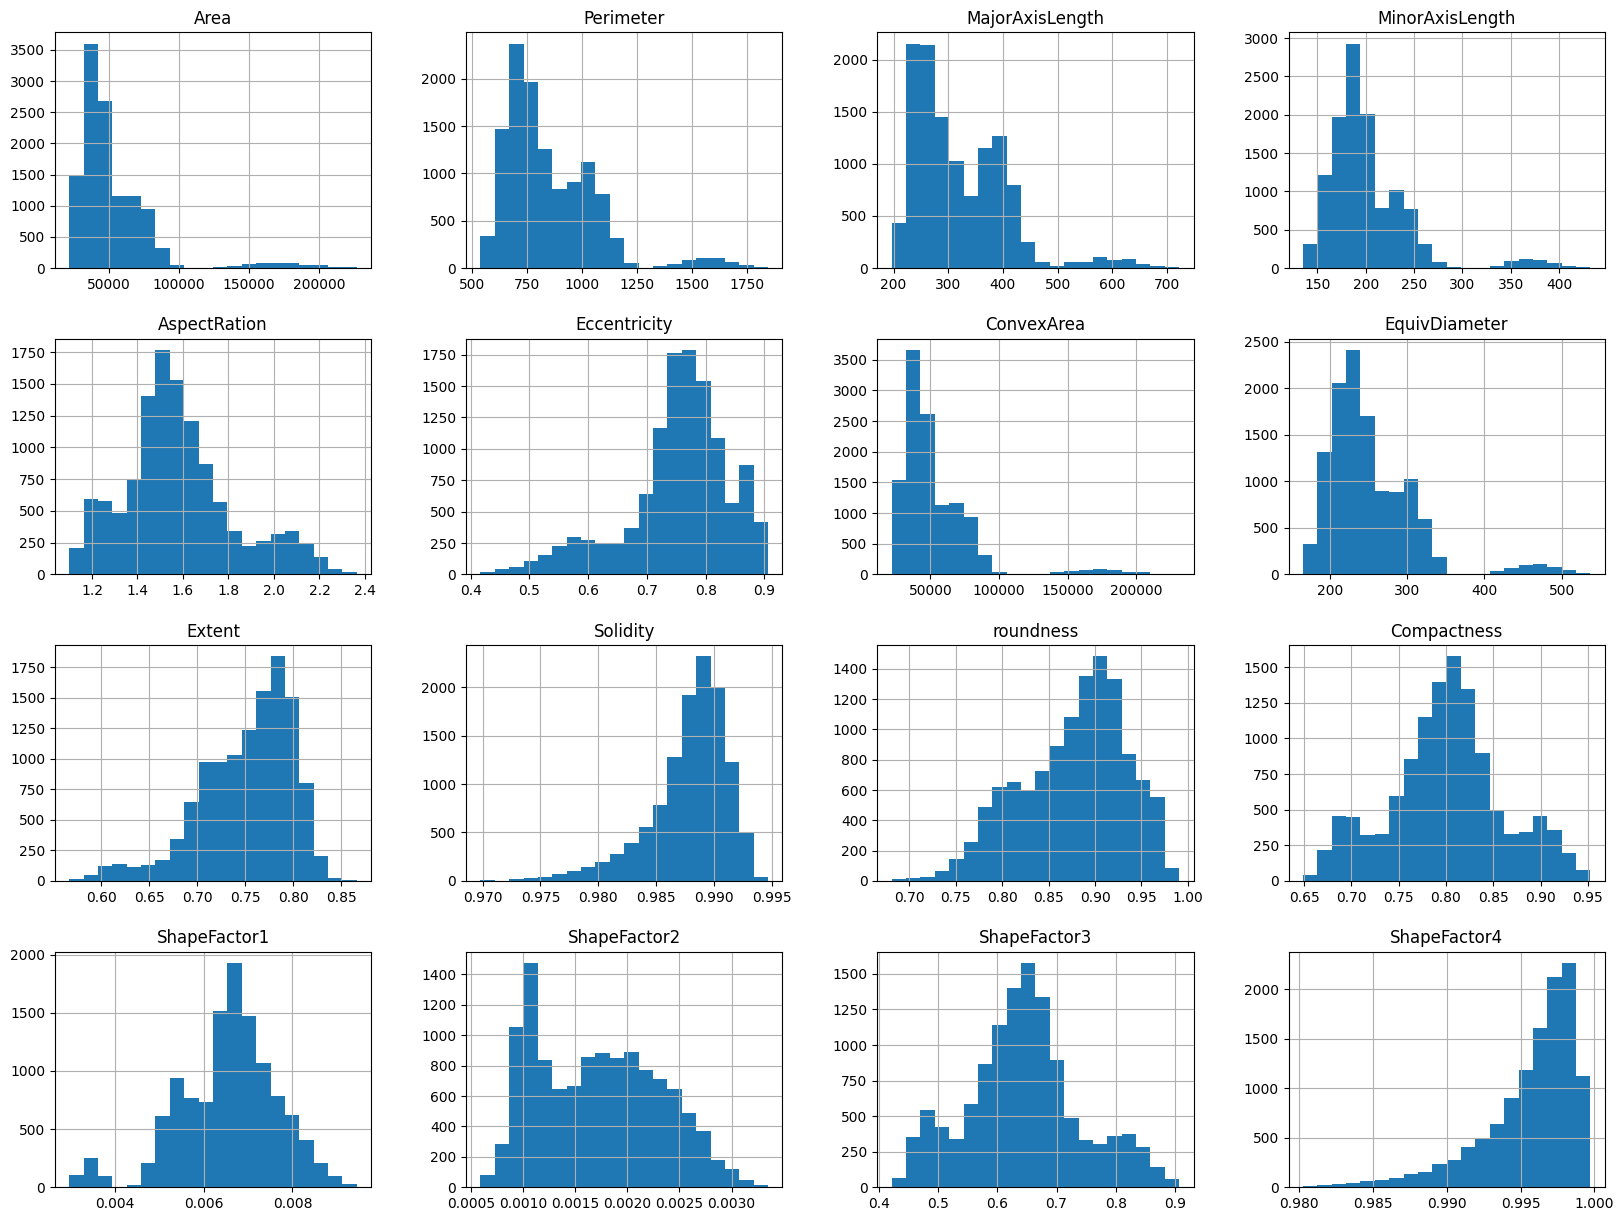

In [23]:
# Visualisasi distribusi data dengan histogram
fig = plt.figure(figsize = (20, 15))
ax = fig.gca()
df_not_outlier.hist(ax = ax, bins=20)

Dari 16 fitur, hanya beberapa distribusi saja yang memiliki karakteristik relatif serupa dengan distribusi normal. Mayoritas distribusi bersifat right skewed maupun left skewed sehingga ke depannya, perlu dilakukan normalisasi data. Selain itu, karena persebaran data bervariasi tiap fitur, harus dilakukan standardisasi data juga.

#### 9. Categorical data exploration

##### Using bar plot

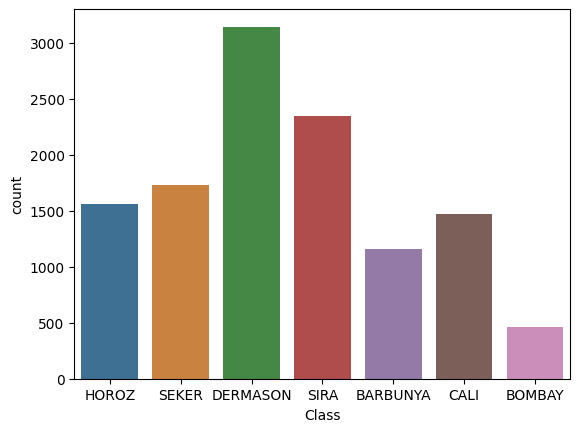

In [24]:
sns.countplot(data=df_not_outlier,
              x="Class",
              hue='Class',
              order=['HOROZ', "SEKER", "DERMASON", "SIRA", "BARBUNYA", "CALI", "BOMBAY"],
              palette= {
                  'HOROZ': "#3073A2",
                  'SEKER': "#E1812A",
                  'DERMASON': "#3A923A",
                  'SIRA': "#BF3C3C",
                  'BARBUNYA': "#9472AF",
                  "CALI": "#835B53",
                  "BOMBAY": '#D584BE'
              }
              )
plt.show()

Distribusi jumlah instance tiap class tidak imbang dengan class 'DERMASON' berjumlah paling besar +- 3500 dan class 'BOMBAY' bernilai paling kecil +- 500. Pada klasifikasi, hasil klasifikasi akan cenderung mengelompokkan data tes ke class dengan jumlah instance terbanyak \(karena mesin lebih banyak belajar) sehingga harus dilakukan data balancing.

#### 10. Correlation Analysis


##### Pearson's Correlation Formula =
$$
\rho_{xy} = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{y})^2}\sqrt{\sum_{i=1}^{n}(y_i - \bar{y})^2}}
$$

In [25]:
corr_matrix = df_not_outlier.corr(method='pearson', numeric_only=True)
corr_matrix

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.968551,0.933079,0.954193,0.248362,0.278956,0.999966,0.985563,0.064708,-0.252619,-0.392383,-0.276762,-0.855090,-0.648959,-0.281432,-0.457658
Perimeter,0.968551,1.000000,0.978972,0.916549,0.391865,0.404367,0.969377,0.992770,-0.007428,-0.364977,-0.576375,-0.415873,-0.871897,-0.776209,-0.418239,-0.532844
MajorAxisLength,0.933079,0.978972,1.000000,0.830896,0.554144,0.551429,0.933741,0.962930,-0.065107,-0.347138,-0.639674,-0.574125,-0.782603,-0.864765,-0.574527,-0.595825
MinorAxisLength,0.954193,0.916549,0.830896,1.000000,0.003243,0.037055,0.954130,0.949924,0.151788,-0.217566,-0.242056,-0.029914,-0.948922,-0.484753,-0.034876,-0.355269
AspectRation,0.248362,0.391865,0.554144,0.003243,1.000000,0.927275,0.249519,0.311729,-0.360258,-0.291017,-0.805828,-0.987889,0.007962,-0.837996,-0.978845,-0.519826
Eccentricity,0.278956,0.404367,0.551429,0.037055,0.927275,1.000000,0.280438,0.332104,-0.310092,-0.350317,-0.771582,-0.972589,-0.001320,-0.863783,-0.982929,-0.529689
ConvexArea,0.999966,0.969377,0.933741,0.954130,0.249519,0.280438,1.000000,0.985897,0.063626,-0.259963,-0.395840,-0.278150,-0.855430,-0.650351,-0.282863,-0.461285
EquivDiameter,0.985563,0.992770,0.962930,0.949924,0.311729,0.332104,0.985897,1.000000,0.037833,-0.300383,-0.476160,-0.338008,-0.897299,-0.721908,-0.341384,-0.502926
Extent,0.064708,-0.007428,-0.065107,0.151788,-0.360258,-0.310092,0.063626,0.037833,1.000000,0.162942,0.330817,0.342478,-0.143561,0.224634,0.335860,0.102123
Solidity,-0.252619,-0.364977,-0.347138,-0.217566,-0.291017,-0.350317,-0.259963,-0.300383,0.162942,1.000000,0.619958,0.331706,0.234985,0.411637,0.339918,0.574372


#### Visualisasi dalam heatmap

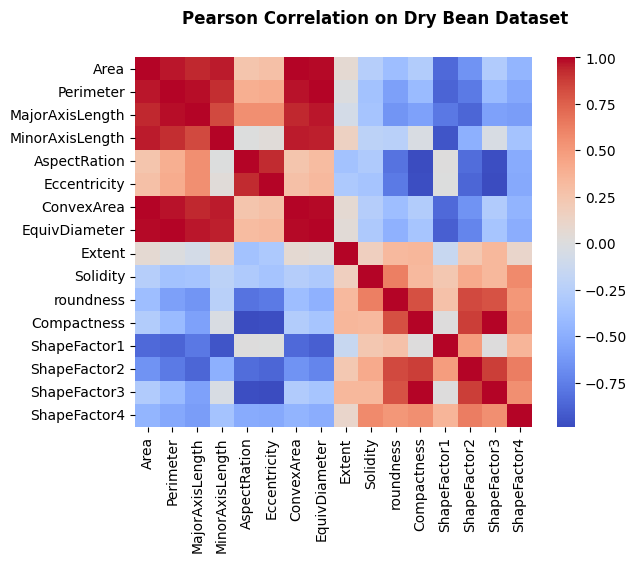

In [26]:
sns.heatmap(corr_matrix, cmap='coolwarm')

plt.suptitle('Pearson Correlation on Dry Bean Dataset', fontweight='bold')
plt.show()

## Data Preprocessing

### Splitting Data into Data Testing and Data Training (20:80)

In [27]:
df_not_outlier

,Class,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
13,BARBUNYA,47003.0,821.301,300.190765,200.111284,1.500119,0.745403,47681.0,244.634581,0.775781,0.985780,0.875650,0.814930,0.006387,0.001738,0.664112,0.996246
14,BARBUNYA,47143.0,858.562,296.846278,203.058712,1.461874,0.729432,47996.0,244.998636,0.717987,0.982228,0.803681,0.825338,0.006297,0.001802,0.681183,0.995805
15,BARBUNYA,47149.0,857.690,300.287893,200.319914,1.499042,0.744975,48091.0,245.014227,0.720767,0.980412,0.805419,0.815931,0.006369,0.001741,0.665744,0.997977
16,BARBUNYA,47668.0,846.128,300.107152,202.881161,1.479226,0.736875,48450.0,246.359052,0.814754,0.983860,0.836690,0.820904,0.006296,0.001764,0.673883,0.996825
21,BARBUNYA,48160.0,829.234,304.528282,202.715513,1.502245,0.746246,48950.0,247.627172,0.754043,0.983861,0.880121,0.813150,0.006323,0.001705,0.661213,0.993304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13520,SIRA,55885.0,883.311,336.198075,213.237788,1.576635,0.773118,56476.0,266.748931,0.801058,0.989535,0.900073,0.793428,0.006016,0.001471,0.629528,0.992535
13524,SIRA,56131.0,895.196,352.178992,203.305069,1.732269,0.816548,56543.0,267.335387,0.785291,0.992714,0.880190,0.759090,0.006274,0.001285,0.576217,0.998162
13525,SIRA,56214.0,898.795,347.755047,206.614216,1.683113,0.804364,56742.0,267.532966,0.717015,0.990695,0.874446,0.769314,0.006186,0.001337,0.591845,0.996141
13526,SIRA,56333.0,904.166,350.359077,205.444135,1.705374,0.810035,56971.0,267.815988,0.689747,0.988801,0.865917,0.764404,0.006219,0.001310,0.584314,0.996474


In [28]:
# Splitting Feature (X) and Target (y)
X = df_not_outlier[df.columns[[*np.arange(0, 16)]]]
y = df_not_outlier[df.columns[16]]
y

#import library
from sklearn.model_selection import train_test_split

#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=2024,
                                                    shuffle=True)
# Index sebelumnya tetap dijaga untuk kemungkinan inspeksi dengan data asli
# X_train.reset_index(drop=True, inplace=True)
# y_train.reset_index(drop=True, inplace=True)
# X_test.reset_index(drop=True, inplace=True)
# y_test.reset_index(drop=True, inplace=True)
y_train = pd.DataFrame(y_train, columns=['Class'])
y_test = pd.DataFrame(y_test, columns=['Class'])

In [29]:
X_test

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
573,68131.0,1036.382,357.762119,243.628702,1.468473,0.732302,69197.0,294.528578,0.776917,0.984595,0.797104,0.823253,0.005251,0.001488,0.677745,0.995250
5787,34044.0,686.252,256.774135,169.170536,1.517842,0.752292,34448.0,208.197423,0.779253,0.988272,0.908413,0.810819,0.007542,0.002011,0.657428,0.997872
11845,42893.0,773.543,290.765963,188.086140,1.545919,0.762605,43404.0,233.694381,0.760110,0.988227,0.900798,0.803720,0.006779,0.001745,0.645966,0.998611
1554,169004.0,1546.598,566.415658,380.970767,1.486769,0.740007,170517.0,463.877760,0.736035,0.991127,0.887875,0.818971,0.003351,0.000930,0.670713,0.997195
3354,89559.0,1158.625,446.626924,258.200814,1.729766,0.815957,91501.0,337.683373,0.734518,0.978776,0.838365,0.756075,0.004987,0.001005,0.571649,0.988819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5261,31954.0,658.228,240.244594,169.717734,1.415554,0.707776,32359.0,201.705469,0.724055,0.987484,0.926792,0.839584,0.007518,0.002304,0.704901,0.997825
11530,41445.0,760.833,282.811624,187.392288,1.509196,0.748969,42088.0,229.715940,0.716917,0.984722,0.899712,0.812258,0.006824,0.001832,0.659763,0.995711
8675,62459.0,993.163,381.280738,210.141088,1.814404,0.834409,63358.0,282.002250,0.635166,0.985811,0.795727,0.739618,0.006104,0.001127,0.547035,0.992543
12578,46181.0,822.469,306.996749,192.697327,1.593155,0.778467,46858.0,242.486031,0.729051,0.985552,0.857895,0.789865,0.006648,0.001596,0.623887,0.993949


Splitting data dilakukan di awal karena karakteristik dari data training akan menjadi acuan terhadap transformasi data testing

### Standardize with StandardScaler
Standardize formula
$$
z = \frac{{x - \mu}}{{\sigma}} \
$$

In [30]:
# Import library
from sklearn.preprocessing import StandardScaler

In [31]:
X_test_index = X_test.index.copy()
X_train_index = X_train.index.copy()
y_test_index = y_test.index.copy()
y_train_index = y_train.index.copy()

In [32]:
# Initiating and fitting StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

# Transform data for training data
X_train = scaler.transform(X_train)

# Transform data for testing data
X_test = scaler.transform(X_test)

#Transform back to DataFrame
X_train = pd.DataFrame(X_train, columns= df.columns[0:16], index= X_train_index)
X_test = pd.DataFrame(X_test, columns= df.columns[0:16], index= X_test_index)

In [33]:
X_train

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
10200,-0.410449,-0.544842,-0.757552,0.062928,-1.380161,-1.737949,-0.414414,-0.414489,0.151285,0.801661,1.281181,1.565210,-0.302312,1.267565,1.618547,0.708848
2851,0.812894,0.996180,1.164704,0.753424,0.795807,0.839390,0.815017,1.010594,-0.020502,-0.496213,-0.481386,-0.893323,-0.988086,-1.141571,-0.899953,-2.204589
3733,-0.944590,-1.216266,-1.265788,-1.090962,-0.818256,-0.679202,-0.941861,-1.240299,0.926411,-0.620556,0.491383,0.791189,1.610158,1.608842,0.776014,-0.287973
3089,0.960435,1.152938,1.238502,0.948588,0.640995,0.745040,0.974891,1.157225,0.018564,-1.778505,-0.588708,-0.740059,-1.178762,-1.123998,-0.756400,-1.199516
8173,0.080711,0.360484,0.777731,-0.421339,2.150401,1.437178,0.077465,0.212472,-0.403516,0.341856,-1.283392,-1.852562,0.370698,-1.278292,-1.757791,0.172873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2812,0.794807,0.978239,0.986700,0.904223,0.337201,0.537363,0.797383,0.992338,1.495110,-0.546185,-0.477078,-0.476402,-1.132612,-0.949227,-0.505264,-1.684634
3015,0.915048,1.123849,1.255637,0.849375,0.797684,0.840491,0.913907,1.112544,0.738641,-0.151241,-0.665894,-0.884175,-1.084134,-1.170942,-0.891435,-1.675852
2979,0.890661,1.015328,1.084868,0.990663,0.369078,0.560703,0.893200,1.088382,-0.220056,-0.541866,-0.153396,-0.507673,-1.205996,-0.998276,-0.535327,-1.766269
4102,-0.876306,-1.117808,-1.072226,-1.102234,-0.356389,-0.087353,-0.876368,-1.122616,-0.733344,0.253535,0.593975,0.281959,1.603815,0.981338,0.246585,0.977425


In [34]:
# Evaluate mean (indicator ~0) and standard deviation (indicator ~1)
mean_std_columns = {}
for feature in X.columns:
  mean_std_columns[feature]= {}
  mean_std_columns[feature]['mean'] = X_train[feature].mean()
  mean_std_columns[feature]['std'] = X_train[feature]\
                                      .std( axis=0,
                                            ddof=1)

mean_std_columns = pd.DataFrame.from_dict(mean_std_columns).transpose()
mean_std_columns


,mean,std
Area,5.982258e-18,1.000053
Perimeter,-3.940813e-16,1.000053
MajorAxisLength,4.531561e-16,1.000053
MinorAxisLength,-1.532954e-16,1.000053
AspectRation,4.464260e-16,1.000053
Eccentricity,-6.590766e-16,1.000053
ConvexArea,4.561472e-17,1.000053
EquivDiameter,3.207986e-16,1.000053
Extent,-4.591383e-16,1.000053
Solidity,1.010815e-14,1.000053


Histogram Visualization after Standardization

C:\Users\Ferdiansyah Dwi N\AppData\Local\Temp\ipykernel_21892\1264245166.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  X_train.hist(ax = ax, bins=20)


array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Perimeter'}>,
        <Axes: title={'center': 'MajorAxisLength'}>,
        <Axes: title={'center': 'MinorAxisLength'}>],
       [<Axes: title={'center': 'AspectRation'}>,
        <Axes: title={'center': 'Eccentricity'}>,
        <Axes: title={'center': 'ConvexArea'}>,
        <Axes: title={'center': 'EquivDiameter'}>],
       [<Axes: title={'center': 'Extent'}>,
        <Axes: title={'center': 'Solidity'}>,
        <Axes: title={'center': 'roundness'}>,
        <Axes: title={'center': 'Compactness'}>],
       [<Axes: title={'center': 'ShapeFactor1'}>,
        <Axes: title={'center': 'ShapeFactor2'}>,
        <Axes: title={'center': 'ShapeFactor3'}>,
        <Axes: title={'center': 'ShapeFactor4'}>]], dtype=object)

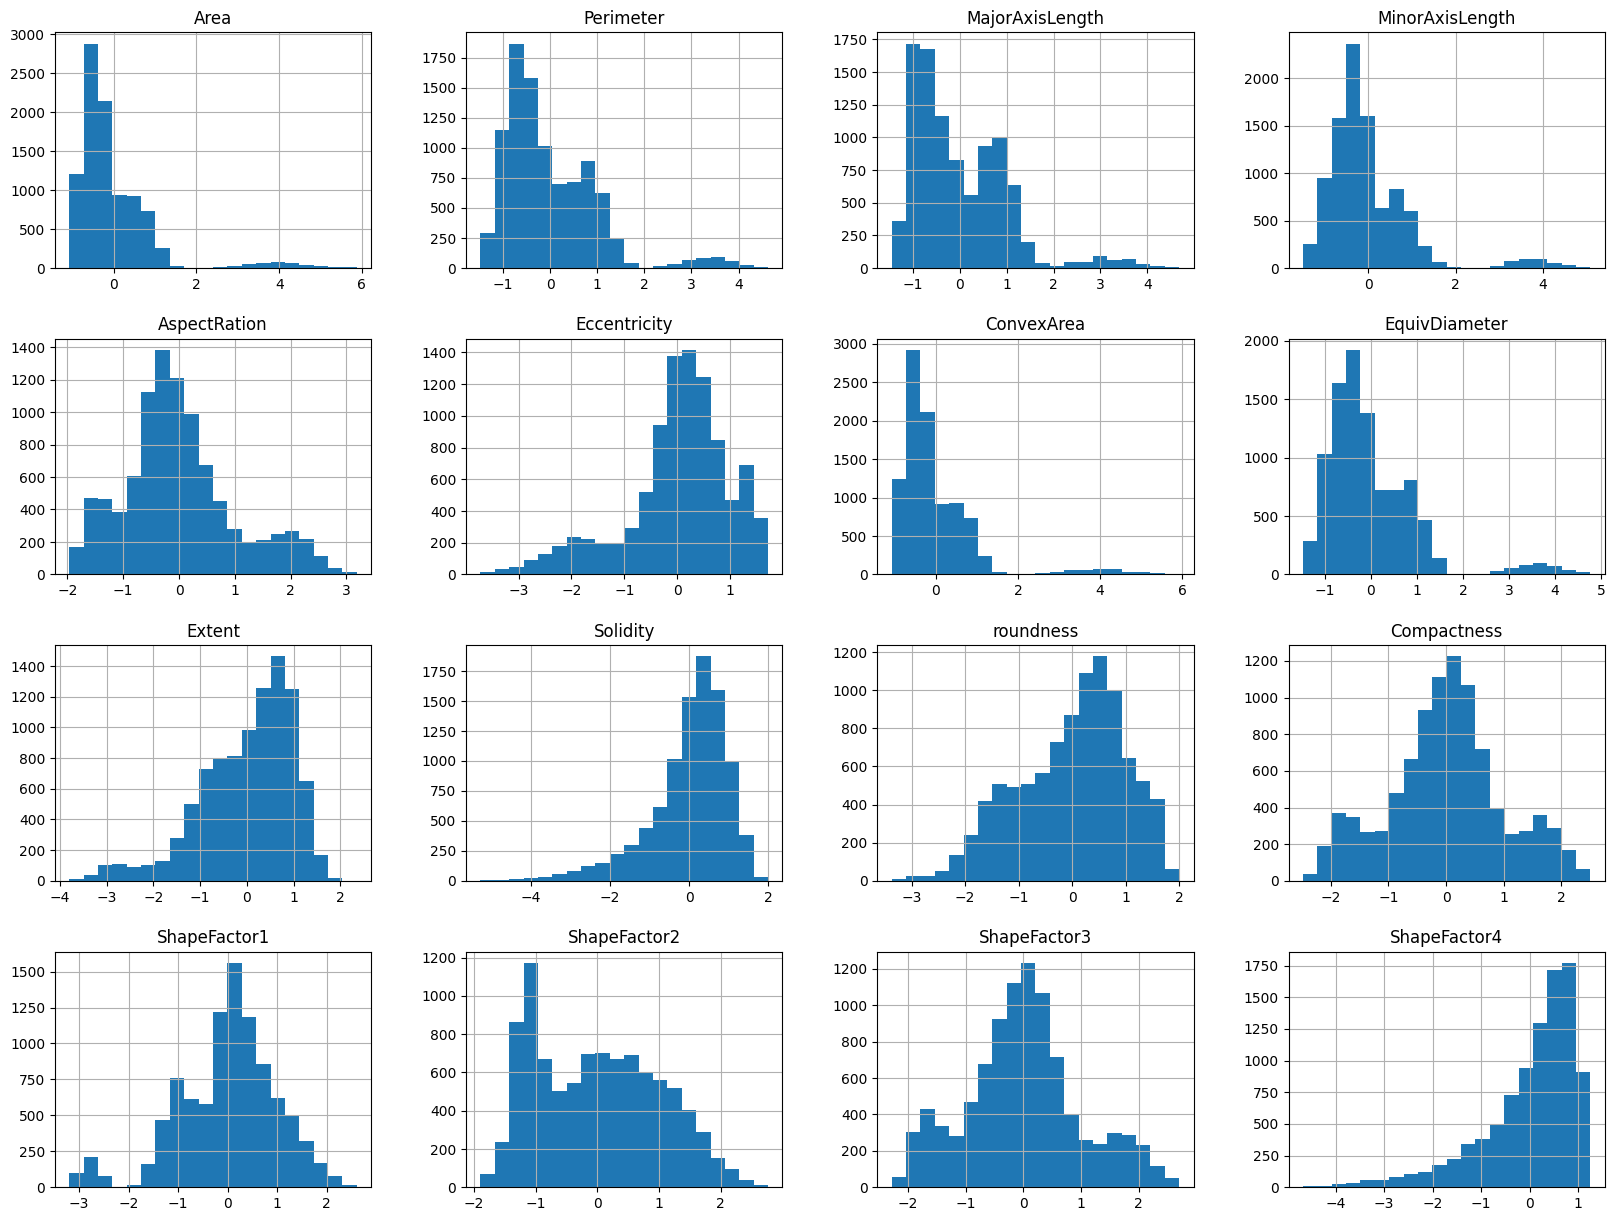

In [35]:
# Visualisasi distribusi data dengan histogram
fig = plt.figure(figsize = (20, 15))
ax = fig.gca()
X_train.hist(ax = ax, bins=20)

Dataset sudah berada pada range yang relatih sama, tetapi masih mempertahankan skewness-nya. Beberapa fitur menggambarkan distribusi bimodal.

### Principal Component Transformation by Adding Varimax Rotation

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [37]:
print(X_train_pca.shape, X_test_pca.shape)

(9502, 8) (2376, 8)


#### Visualization PCA using 2 PCA component.
Varimax Rotation only works as an analysis factor, and doesn't change data preprocessing phase

C:\Users\Ferdiansyah Dwi N\AppData\Local\Temp\ipykernel_21892\227919968.py:38: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(X_viz[:, 0] * scale_PC1,


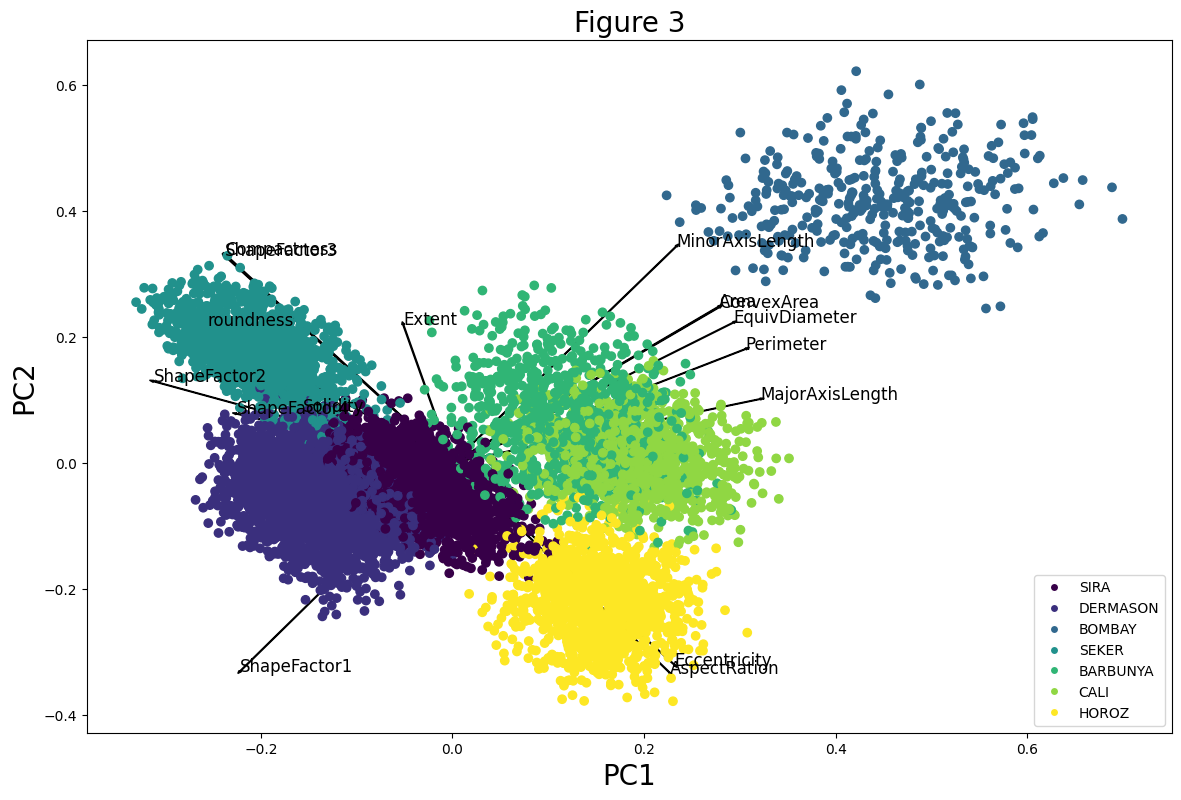

In [38]:
pca_viz = PCA(n_components=2)
X_viz = pca_viz.fit_transform(X_train)
loadings = pd.DataFrame(pca_viz.components_.T,
                        columns=['PC1', 'PC2'],
                        index=X_train.columns)

ldngs = pca_viz.components_

#scale data component PCA to fit PCA loadings
scale_PC1 = 1.0 / (X_viz[:,0].max() - X_viz[:,1].min())
scale_PC2 = 1.0/(X_viz[:, 1].max() - X_viz[:,1].min())

#visualization

fig, ax = plt.subplots(figsize=(14, 9))

for i, feature in enumerate(X_train.columns):
    ax.arrow(0, 0, ldngs[0, i],
             ldngs[1, i])
    ax.text(ldngs[0, i] * 1,
            ldngs[1, i] * 1,
            feature, fontsize = 12)



color_map = {'SIRA': '#370048',
             'DERMASON': '#3A2F7D',
             'BOMBAY': '#31688E',
             'SEKER': '#21918C',
             'BARBUNYA': '#30B575',
             'CALI': '#90D743',
             'HOROZ': '#FDE724'
             }

colors = [color_map[val] for val in y_train['Class']]


scatter = ax.scatter(X_viz[:, 0] * scale_PC1,
                     X_viz[:, 1] * scale_PC2,
                     c=colors,
                     cmap='viridis')

ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
ax.set_title('Figure 3', fontsize=20)

legend_labels = {label: color for label, color in color_map.items()}
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color) for label, color in legend_labels.items()],
           loc='lower right')

Varimax rotation tidak digunakan karena hanya berguna untuk memfasilitasi visualisasi, bukan transformasi data

### SMOTE

In [39]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca, y_train)
X_train_resampled = pd.DataFrame(X_train_resampled)
y_train_resampled = pd.DataFrame(y_train_resampled, columns=['Class'])


In [40]:
y_train_resampled.groupby(by='Class').value_counts()

Class
BARBUNYA    2484
BOMBAY      2484
CALI        2484
DERMASON    2484
HOROZ       2484
SEKER       2484
SIRA        2484
Name: count, dtype: int64

C:\Users\Ferdiansyah Dwi N\AppData\Local\Temp\ipykernel_21892\457369556.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['DERMASON', 'SIRA', 'SEKER', 'HOROZ', 'CALI', 'BARBUNYA', 'BOMBAY'])


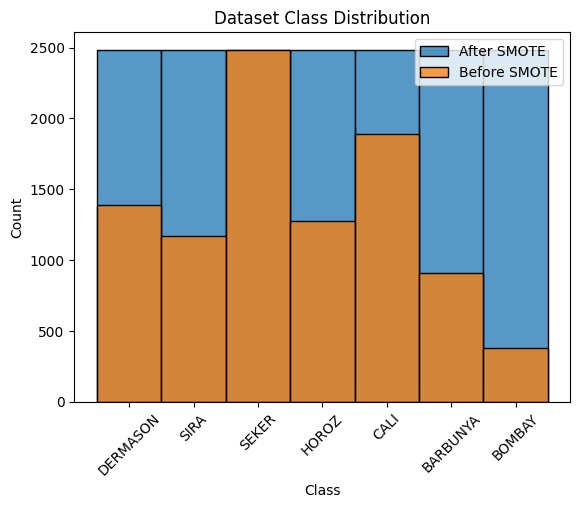

In [41]:
sns.histplot(data=y_train_resampled,
             x='Class',
             label='After SMOTE')
sns.histplot(data=y_train,
             x='Class',
             label='Before SMOTE')

plt.gca().set_xticklabels(['DERMASON', 'SIRA', 'SEKER', 'HOROZ', 'CALI', 'BARBUNYA', 'BOMBAY'])
plt.title("Dataset Class Distribution")
plt.legend(loc="upper right")
plt.xticks(rotation=45)

plt.show()

Data balancing dilakukan terhadap semua class dengan benchmarking terhadap class dengan distribusi terbanyak (DERMASON)

## Modelling

#### Menggabungkan Data

In [82]:
df_train = X_train.join(y_train, how='outer')
df_test = X_test.join(y_test, how='outer')

In [83]:
data = pd.concat([df_train, df_test], ignore_index=False)

In [84]:
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
10200,-0.410449,-0.544842,-0.757552,0.062928,-1.380161,-1.737949,-0.414414,-0.414489,0.151285,0.801661,1.281181,1.565210,-0.302312,1.267565,1.618547,0.708848,SEKER
2851,0.812894,0.996180,1.164704,0.753424,0.795807,0.839390,0.815017,1.010594,-0.020502,-0.496213,-0.481386,-0.893323,-0.988086,-1.141571,-0.899953,-2.204589,CALI
3733,-0.944590,-1.216266,-1.265788,-1.090962,-0.818256,-0.679202,-0.941861,-1.240299,0.926411,-0.620556,0.491383,0.791189,1.610158,1.608842,0.776014,-0.287973,DERMASON
3089,0.960435,1.152938,1.238502,0.948588,0.640995,0.745040,0.974891,1.157225,0.018564,-1.778505,-0.588708,-0.740059,-1.178762,-1.123998,-0.756400,-1.199516,CALI
8173,0.080711,0.360484,0.777731,-0.421339,2.150401,1.437178,0.077465,0.212472,-0.403516,0.341856,-1.283392,-1.852562,0.370698,-1.278292,-1.757791,0.172873,HOROZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5261,-0.723685,-0.918143,-0.938175,-0.731075,-0.681582,-0.484343,-0.722807,-0.874306,-0.567829,-0.109416,0.875808,0.647430,0.873196,0.999661,0.624553,0.677549,DERMASON
11530,-0.402218,-0.440132,-0.442429,-0.339374,-0.299665,-0.026208,-0.397882,-0.403145,-0.714558,-0.917096,0.397000,0.199356,0.250386,0.201515,0.162567,0.033534,SIRA
8675,0.309541,0.642236,0.704367,0.164783,0.945122,0.924009,0.312484,0.476359,-2.395155,-0.598810,-1.441541,-0.991736,-0.394492,-0.990788,-0.991188,-0.931445,HOROZ
12578,-0.241806,-0.152985,-0.160763,-0.221804,0.042763,0.301852,-0.238576,-0.188340,-0.465129,-0.674469,-0.342352,-0.167823,0.092506,-0.197597,-0.204618,-0.503242,SIRA


Karakteristik pycaret memampukan preprocessing dilakukan pada pycaret itu sendiri sebagai sebuah proses yang tidak terpisah sehingga preprocess yang telah dilakukan menjadi tidak jadi diikutsertakan dan diganti menggunakan preprocess bawaan dari pycaret kecuali beberapa yang menggunakan kustomisasi pada preprocessing.

### Random Forest

#### Pembuatan Dictionary untuk Evaluasi Metriks Eksperimen

In [45]:
experiment_dict_rf = {}
eval_dict = {}

#### A. Using Original Data

In [46]:
from pycaret.classification import setup, create_model, plot_model, predict_model, evaluate_model, tune_model, get_config, pull

rf_01 = setup(data= data,
             target = 'Class',
             train_size = 0.8,
             data_split_shuffle = True,
             index = True,
             preprocess = False,
             fold_strategy = 'stratifiedkfold',
             fold_shuffle = True,
             fold = 5,
             session_id = 2024
             )
model_rf_01 = create_model('rf')

,Description,Value
0,Session id,2024
1,Target,Class
2,Target type,Multiclass
3,Original data shape,"(11878, 17)"
4,Transformed data shape,"(11878, 17)"
5,Transformed train set shape,"(9502, 17)"
6,Transformed test set shape,"(2376, 17)"
7,Numeric features,16


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9432,0.9958,0.9432,0.9436,0.9433,0.9312,0.9312
1,0.9532,0.9975,0.9532,0.9532,0.9530,0.9433,0.9434
2,0.9421,0.9959,0.9421,0.9425,0.9422,0.9298,0.9299
3,0.9495,0.9970,0.9495,0.9496,0.9494,0.9388,0.9388
4,0.9453,0.9958,0.9453,0.9453,0.9452,0.9337,0.9337
Mean,0.9466,0.9964,0.9466,0.9468,0.9466,0.9354,0.9354
Std,0.0041,0.0007,0.0041,0.0040,0.0040,0.0050,0.0050


##### Evaluasi Model

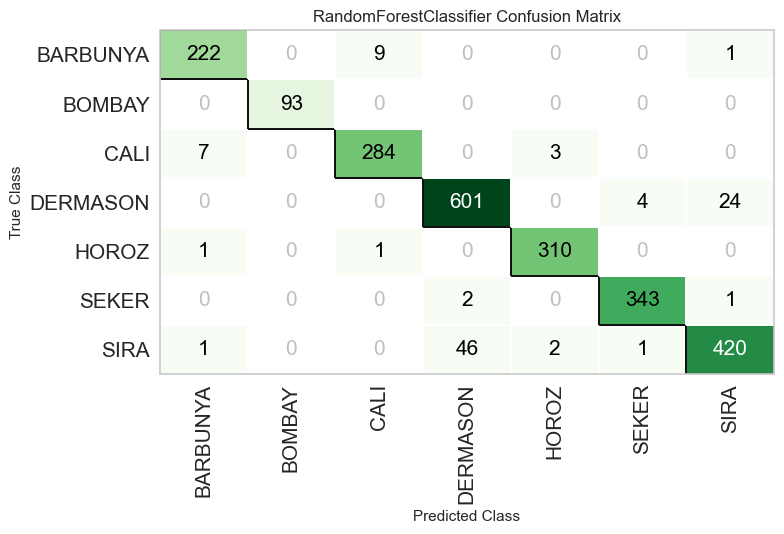

In [47]:
plot_model(model_rf_01, 'confusion_matrix')

In [48]:
evaluate_model(model_rf_01)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [49]:
#Mengambil metriks penilaian model (accuracy, precision, recall)
metrics_rf_01 = pull()
metrics_rf_01

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9432,0.9958,0.9432,0.9436,0.9433,0.9312,0.9312
1,0.9532,0.9975,0.9532,0.9532,0.9530,0.9433,0.9434
2,0.9421,0.9959,0.9421,0.9425,0.9422,0.9298,0.9299
3,0.9495,0.9970,0.9495,0.9496,0.9494,0.9388,0.9388
4,0.9453,0.9958,0.9453,0.9453,0.9452,0.9337,0.9337
Mean,0.9466,0.9964,0.9466,0.9468,0.9466,0.9354,0.9354
Std,0.0041,0.0007,0.0041,0.0040,0.0040,0.0050,0.0050


##### Pengumpulan Metriks Evaluasi Eksperimen

In [50]:
accuracy = metrics_rf_01.loc['Mean', 'Accuracy']
precision = metrics_rf_01.loc['Mean', 'Prec.']
recall = metrics_rf_01.loc['Mean', 'Recall']

eval_dict['accuracy'] = accuracy * 100
eval_dict['precision'] = precision * 100
eval_dict['recall'] = recall * 100

experiment_dict_rf['a'] = eval_dict.copy()
experiment_dict_rf

{'a': {'accuracy': 94.66, 'precision': 94.67999999999999, 'recall': 94.66}}

#### B. Using Original Data and Optimized Hyperparameters

In [51]:
from pycaret.classification import setup, create_model, predict_model, evaluate_model, tune_model, get_config
rf_02 = setup(data = data,
             target = 'Class',
             train_size = 0.8,
             data_split_shuffle = True,
             index = True,
             preprocess = False,
             fold_strategy = 'stratifiedkfold',
             fold_shuffle = True,
             fold = 5,
             session_id = 2024
             )

model_rf_02 = create_model('rf')

params = {  'n_estimators': [*np.arange(100, 2001)],
            'max_depth': [10, 20, 40, 50 ],
            'max_features': ['auto', 'sqrt', 'log2'],
            'min_samples_split' : [*np.arange(2, 21)],
            'min_samples_leaf' : [*np.arange(1, 16)]
        }
tuned_rf_02 = tune_model(model_rf_02, custom_grid = params)

,Description,Value
0,Session id,2024
1,Target,Class
2,Target type,Multiclass
3,Original data shape,"(11878, 17)"
4,Transformed data shape,"(11878, 17)"
5,Transformed train set shape,"(9502, 17)"
6,Transformed test set shape,"(2376, 17)"
7,Numeric features,16


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9432,0.9958,0.9432,0.9436,0.9433,0.9312,0.9312
1,0.9532,0.9975,0.9532,0.9532,0.9530,0.9433,0.9434
2,0.9421,0.9959,0.9421,0.9425,0.9422,0.9298,0.9299
3,0.9495,0.9970,0.9495,0.9496,0.9494,0.9388,0.9388
4,0.9453,0.9958,0.9453,0.9453,0.9452,0.9337,0.9337
Mean,0.9466,0.9964,0.9466,0.9468,0.9466,0.9354,0.9354
Std,0.0041,0.0007,0.0041,0.0040,0.0040,0.0050,0.0050


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9421,0.9963,0.9421,0.9426,0.9423,0.9299,0.9299
1,0.9511,0.9975,0.9511,0.9512,0.9509,0.9407,0.9408
2,0.9453,0.9967,0.9453,0.9458,0.9454,0.9336,0.9337
3,0.9495,0.9973,0.9495,0.9497,0.9495,0.9388,0.9388
4,0.9432,0.9967,0.9432,0.9433,0.9431,0.9311,0.9312
Mean,0.9462,0.9969,0.9462,0.9465,0.9462,0.9348,0.9349
Std,0.0035,0.0004,0.0035,0.0034,0.0034,0.0042,0.0043


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


##### Evaluasi Model

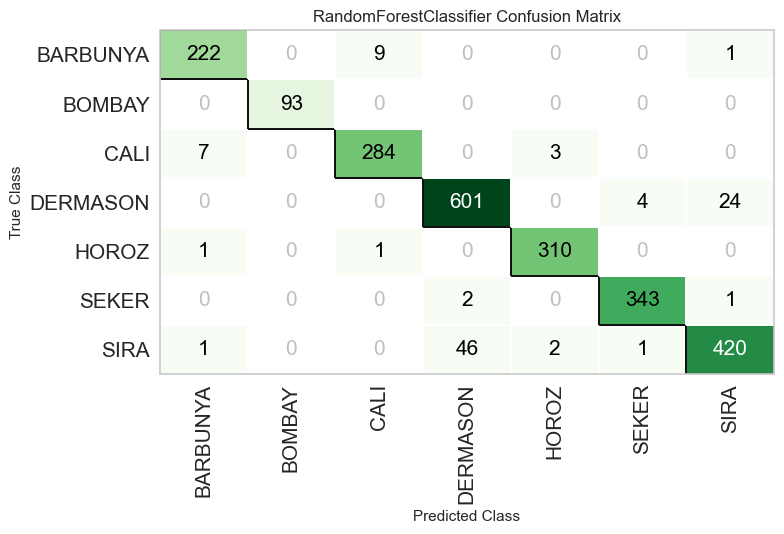

In [52]:
plot_model(tuned_rf_02, 'confusion_matrix')

In [53]:
evaluate_model(tuned_rf_02)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [54]:
#Mengambil metriks penilaian model (accuracy, precision, recall)
metrics_rf_02 = pull()
metrics_rf_02

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9421,0.9963,0.9421,0.9426,0.9423,0.9299,0.9299
1,0.9511,0.9975,0.9511,0.9512,0.9509,0.9407,0.9408
2,0.9453,0.9967,0.9453,0.9458,0.9454,0.9336,0.9337
3,0.9495,0.9973,0.9495,0.9497,0.9495,0.9388,0.9388
4,0.9432,0.9967,0.9432,0.9433,0.9431,0.9311,0.9312
Mean,0.9462,0.9969,0.9462,0.9465,0.9462,0.9348,0.9349
Std,0.0035,0.0004,0.0035,0.0034,0.0034,0.0042,0.0043


##### Pengumpulan Metriks Evaluasi Eksperimen

In [55]:
accuracy = metrics_rf_02.loc['Mean', 'Accuracy']
precision = metrics_rf_02.loc['Mean', 'Prec.']
recall = metrics_rf_02.loc['Mean', 'Recall']

eval_dict['accuracy'] = accuracy * 100
eval_dict['precision'] = precision * 100
eval_dict['recall'] = recall * 100

experiment_dict_rf['b'] = eval_dict.copy()
experiment_dict_rf

{'a': {'accuracy': 94.66, 'precision': 94.67999999999999, 'recall': 94.66},
 'b': {'accuracy': 94.62, 'precision': 94.65, 'recall': 94.62}}

#### C. Using First Eight PCA Components instead of the Original Data

In [56]:
from pycaret.classification import setup, create_model, predict_model, evaluate_model, tune_model, get_config
rf_03 = setup(data = data,
             target = 'Class',
             train_size = 0.8,
             data_split_shuffle = True,
             index = True,
             preprocess = True,
             fold_strategy = 'stratifiedkfold',
             fold_shuffle = True,
             fold = 5,
             session_id = 2024,
             pca = True,
             pca_method = 'linear',
             pca_components = 8
             )

model_rf_03 = create_model('rf')

,Description,Value
0,Session id,2024
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"BARBUNYA: 0, BOMBAY: 1, CALI: 2, DERMASON: 3, HOROZ: 4, SEKER: 5, SIRA: 6"
4,Original data shape,"(11878, 17)"
5,Transformed data shape,"(11878, 9)"
6,Transformed train set shape,"(9502, 9)"
7,Transformed test set shape,"(2376, 9)"
8,Numeric features,16
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9395,0.0000,0.9395,0.9399,0.9396,0.9267,0.9267
1,0.9479,0.0000,0.9479,0.9480,0.9479,0.9369,0.9369
2,0.9537,0.0000,0.9537,0.9543,0.9538,0.9439,0.9439
3,0.9505,0.0000,0.9505,0.9506,0.9504,0.9401,0.9402
4,0.9416,0.0000,0.9416,0.9418,0.9416,0.9292,0.9292
Mean,0.9466,0.0000,0.9466,0.9469,0.9467,0.9354,0.9354
Std,0.0053,0.0000,0.0053,0.0054,0.0053,0.0065,0.0065


##### Evaluasi Model

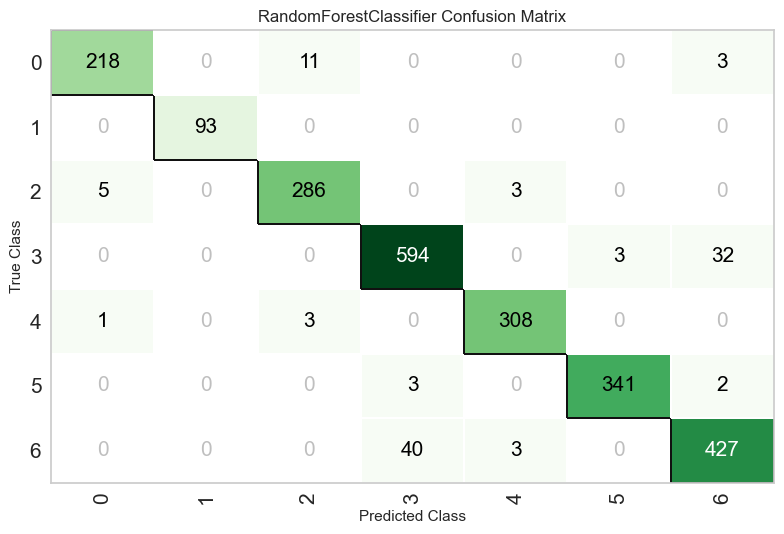

In [57]:
plot_model(model_rf_03, 'confusion_matrix')

In [58]:
evaluate_model(model_rf_03)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [59]:
#Mengambil metriks penilaian model (accuracy, precision, recall)
metrics_rf_03 = pull()
metrics_rf_03

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9395,0.0,0.9395,0.9399,0.9396,0.9267,0.9267
1,0.9479,0.0,0.9479,0.9480,0.9479,0.9369,0.9369
2,0.9537,0.0,0.9537,0.9543,0.9538,0.9439,0.9439
3,0.9505,0.0,0.9505,0.9506,0.9504,0.9401,0.9402
4,0.9416,0.0,0.9416,0.9418,0.9416,0.9292,0.9292
Mean,0.9466,0.0,0.9466,0.9469,0.9467,0.9354,0.9354
Std,0.0053,0.0,0.0053,0.0054,0.0053,0.0065,0.0065


##### Pengumpulan Metriks Evaluasi Eksperimen

In [60]:
accuracy = metrics_rf_03.loc['Mean', 'Accuracy']
precision = metrics_rf_03.loc['Mean', 'Prec.']
recall = metrics_rf_03.loc['Mean', 'Recall']

eval_dict['accuracy'] = accuracy * 100
eval_dict['precision'] = precision * 100
eval_dict['recall'] = recall * 100

experiment_dict_rf['c'] = eval_dict.copy()
experiment_dict_rf

{'a': {'accuracy': 94.66, 'precision': 94.67999999999999, 'recall': 94.66},
 'b': {'accuracy': 94.62, 'precision': 94.65, 'recall': 94.62},
 'c': {'accuracy': 94.66, 'precision': 94.69, 'recall': 94.66}}

#### D. Applying SMOTE Balancing to the Original Variables

In [61]:
from pycaret.classification import setup, create_model, predict_model, evaluate_model, tune_model, get_config
rf_04 = setup(data = data,
             target = 'Class',
             train_size = 0.8,
             data_split_shuffle = True,
             index = True,
             preprocess = True,
             fold_strategy = 'stratifiedkfold',
             fold_shuffle = True,
             fold = 5,
             session_id = 2024,
             pca = False,
             pca_method = 'linear',
             pca_components = 8,
             fix_imbalance = True,
             fix_imbalance_method = 'SMOTE'
             )

model_rf_04 = create_model('rf')

,Description,Value
0,Session id,2024
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"BARBUNYA: 0, BOMBAY: 1, CALI: 2, DERMASON: 3, HOROZ: 4, SEKER: 5, SIRA: 6"
4,Original data shape,"(11878, 17)"
5,Transformed data shape,"(19995, 17)"
6,Transformed train set shape,"(17619, 17)"
7,Transformed test set shape,"(2376, 17)"
8,Numeric features,16
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9416,0.0000,0.9416,0.9420,0.9417,0.9293,0.9293
1,0.9516,0.0000,0.9516,0.9515,0.9515,0.9414,0.9414
2,0.9468,0.0000,0.9468,0.9471,0.9469,0.9356,0.9357
3,0.9489,0.0000,0.9489,0.9491,0.9490,0.9382,0.9382
4,0.9432,0.0000,0.9432,0.9431,0.9431,0.9312,0.9312
Mean,0.9464,0.0000,0.9464,0.9465,0.9464,0.9351,0.9352
Std,0.0037,0.0000,0.0037,0.0036,0.0036,0.0045,0.0045


##### Evaluasi Model

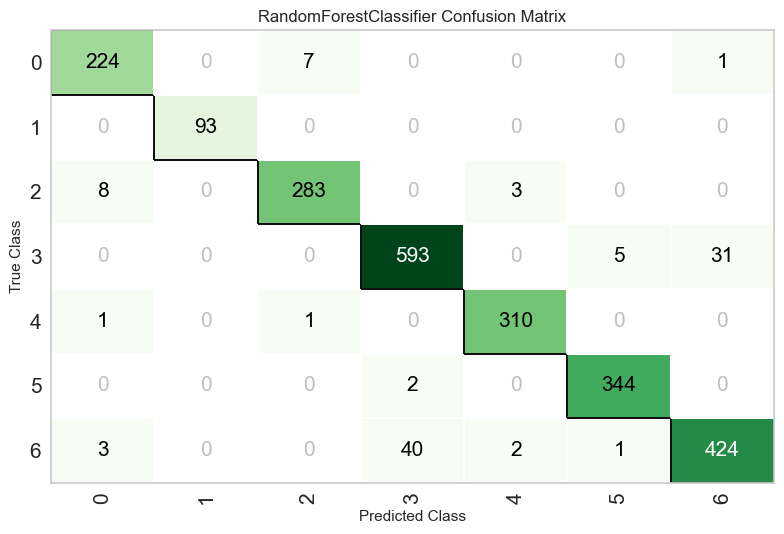

In [62]:
plot_model(model_rf_04, 'confusion_matrix')

In [63]:
evaluate_model(model_rf_04)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [64]:
#Mengambil metriks penilaian model (accuracy, precision, recall)
metrics_rf_04 = pull()
metrics_rf_04

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9416,0.0,0.9416,0.9420,0.9417,0.9293,0.9293
1,0.9516,0.0,0.9516,0.9515,0.9515,0.9414,0.9414
2,0.9468,0.0,0.9468,0.9471,0.9469,0.9356,0.9357
3,0.9489,0.0,0.9489,0.9491,0.9490,0.9382,0.9382
4,0.9432,0.0,0.9432,0.9431,0.9431,0.9312,0.9312
Mean,0.9464,0.0,0.9464,0.9465,0.9464,0.9351,0.9352
Std,0.0037,0.0,0.0037,0.0036,0.0036,0.0045,0.0045


##### Pengumpulan Metriks Evaluasi Eksperimen

In [65]:
accuracy = metrics_rf_04.loc['Mean', 'Accuracy']
precision = metrics_rf_04.loc['Mean', 'Prec.']
recall = metrics_rf_04.loc['Mean', 'Recall']

eval_dict['accuracy'] = accuracy * 100
eval_dict['precision'] = precision * 100
eval_dict['recall'] = recall * 100

experiment_dict_rf['d'] = eval_dict.copy()
experiment_dict_rf

{'a': {'accuracy': 94.66, 'precision': 94.67999999999999, 'recall': 94.66},
 'b': {'accuracy': 94.62, 'precision': 94.65, 'recall': 94.62},
 'c': {'accuracy': 94.66, 'precision': 94.69, 'recall': 94.66},
 'd': {'accuracy': 94.64, 'precision': 94.65, 'recall': 94.64}}

#### E. Using Original Data, Optimised Hyperparameters, and SMOTE

##### Mendapatkan Best Hyperparameters Berdasarkan Experiment B

In [66]:
best_params_ = tuned_rf_02.get_params()
best_params_

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 2024,
 'verbose': 0,
 'warm_start': False}

##### Pembuatan Model dan Proses Learning

In [67]:
from pycaret.classification import setup, create_model, predict_model, evaluate_model, tune_model, get_config
rf_05 = setup( data = data,
                target = 'Class',
                train_size = 0.8,
                data_split_shuffle = True,
                index = True,
                preprocess = True,
                fold_strategy = 'stratifiedkfold',
                fold_shuffle = True,
                fold = 5,
                session_id = 2024,
                pca = False,
                pca_method = 'linear',
                pca_components = 8,
                fix_imbalance = True,
                fix_imbalance_method = 'SMOTE'
            )

model_rf_05 = create_model('rf', 
                            min_samples_leaf = best_params_['min_samples_leaf'],
                            min_samples_split = best_params_['min_samples_split'],
                            n_estimators = best_params_['n_estimators'],
                            max_depth = best_params_['max_depth'],
                            max_features = best_params_['max_features']
                            )

,Description,Value
0,Session id,2024
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"BARBUNYA: 0, BOMBAY: 1, CALI: 2, DERMASON: 3, HOROZ: 4, SEKER: 5, SIRA: 6"
4,Original data shape,"(11878, 17)"
5,Transformed data shape,"(19995, 17)"
6,Transformed train set shape,"(17619, 17)"
7,Transformed test set shape,"(2376, 17)"
8,Numeric features,16
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9416,0.0000,0.9416,0.9420,0.9417,0.9293,0.9293
1,0.9516,0.0000,0.9516,0.9515,0.9515,0.9414,0.9414
2,0.9468,0.0000,0.9468,0.9471,0.9469,0.9356,0.9357
3,0.9489,0.0000,0.9489,0.9491,0.9490,0.9382,0.9382
4,0.9432,0.0000,0.9432,0.9431,0.9431,0.9312,0.9312
Mean,0.9464,0.0000,0.9464,0.9465,0.9464,0.9351,0.9352
Std,0.0037,0.0000,0.0037,0.0036,0.0036,0.0045,0.0045


##### Evaluasi Model

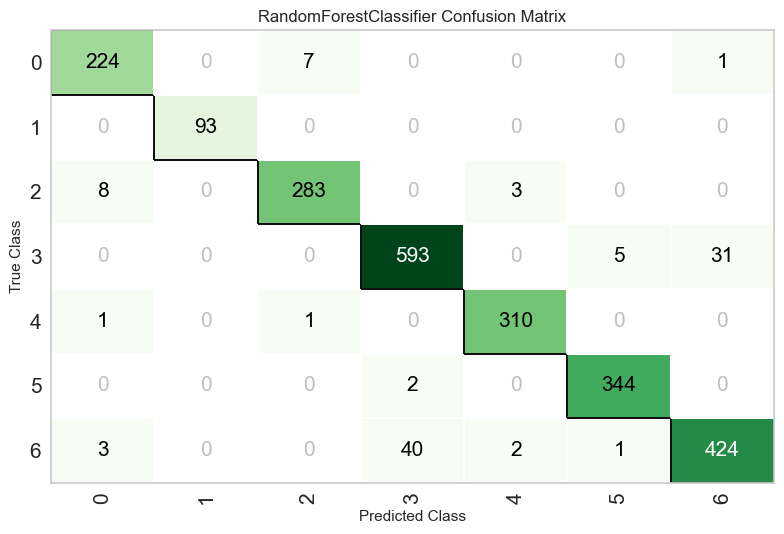

In [68]:
plot_model(model_rf_05, 'confusion_matrix')

In [69]:
evaluate_model(model_rf_05)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [70]:
#Mengambil metriks penilaian model (accuracy, precision, recall)
metrics_rf_05 = pull()
metrics_rf_05

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9416,0.0,0.9416,0.9420,0.9417,0.9293,0.9293
1,0.9516,0.0,0.9516,0.9515,0.9515,0.9414,0.9414
2,0.9468,0.0,0.9468,0.9471,0.9469,0.9356,0.9357
3,0.9489,0.0,0.9489,0.9491,0.9490,0.9382,0.9382
4,0.9432,0.0,0.9432,0.9431,0.9431,0.9312,0.9312
Mean,0.9464,0.0,0.9464,0.9465,0.9464,0.9351,0.9352
Std,0.0037,0.0,0.0037,0.0036,0.0036,0.0045,0.0045


##### Pengumpulan Metriks Evaluasi Eksperimen

In [72]:
accuracy = metrics_rf_05.loc['Mean', 'Accuracy']
precision = metrics_rf_05.loc['Mean', 'Prec.']
recall = metrics_rf_05.loc['Mean', 'Recall']

eval_dict['accuracy'] = accuracy * 100
eval_dict['precision'] = precision * 100
eval_dict['recall'] = recall * 100

experiment_dict_rf['e'] = eval_dict.copy()
experiment_dict_rf

{'a': {'accuracy': 94.66, 'precision': 94.67999999999999, 'recall': 94.66},
 'b': {'accuracy': 94.62, 'precision': 94.65, 'recall': 94.62},
 'c': {'accuracy': 94.66, 'precision': 94.69, 'recall': 94.66},
 'd': {'accuracy': 94.64, 'precision': 94.65, 'recall': 94.64},
 'e': {'accuracy': 94.64, 'precision': 94.65, 'recall': 94.64}}

#### F. Using First Eight PCA Components and SMOTE Balancing 

In [73]:
from pycaret.classification import setup, create_model, predict_model, evaluate_model, tune_model, get_config
rf_06 = setup(data = data,
             target = 'Class',
             train_size = 0.8,
             data_split_shuffle = True,
             index = True,
             preprocess = False,
             fold_strategy = 'stratifiedkfold',
             fold_shuffle = True,
             fold = 5,
             session_id = 2024,
             pca = True,
             pca_method = 'linear',
             pca_components = 8,
             fix_imbalance = True,
             fix_imbalance_method = 'SMOTE'
             )

model_rf_06 = create_model('rf')

,Description,Value
0,Session id,2024
1,Target,Class
2,Target type,Multiclass
3,Original data shape,"(11878, 17)"
4,Transformed data shape,"(11878, 17)"
5,Transformed train set shape,"(9502, 17)"
6,Transformed test set shape,"(2376, 17)"
7,Numeric features,16


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9432,0.9958,0.9432,0.9436,0.9433,0.9312,0.9312
1,0.9532,0.9975,0.9532,0.9532,0.9530,0.9433,0.9434
2,0.9421,0.9959,0.9421,0.9425,0.9422,0.9298,0.9299
3,0.9495,0.9970,0.9495,0.9496,0.9494,0.9388,0.9388
4,0.9453,0.9958,0.9453,0.9453,0.9452,0.9337,0.9337
Mean,0.9466,0.9964,0.9466,0.9468,0.9466,0.9354,0.9354
Std,0.0041,0.0007,0.0041,0.0040,0.0040,0.0050,0.0050


##### Evaluasi Model

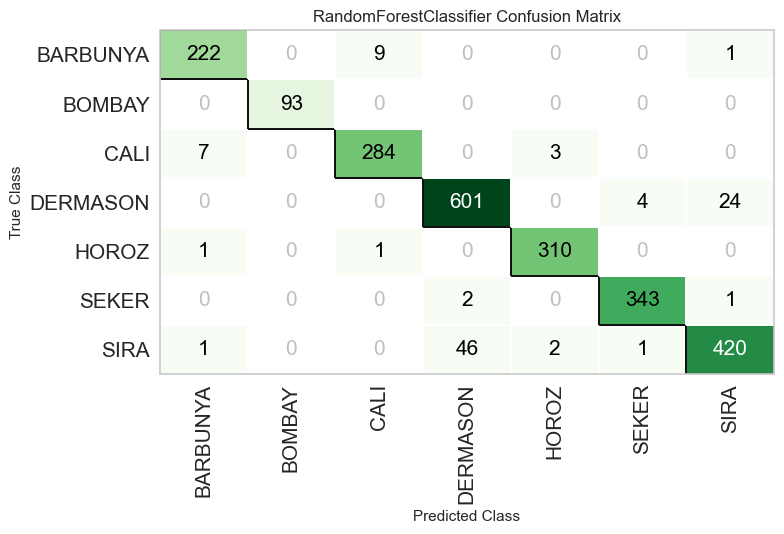

In [74]:
plot_model(model_rf_06, 'confusion_matrix')

In [75]:
evaluate_model(model_rf_06)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [76]:
#Mengambil metriks penilaian model (accuracy, precision, recall)
metrics_rf_06 = pull()
metrics_rf_06

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9432,0.9958,0.9432,0.9436,0.9433,0.9312,0.9312
1,0.9532,0.9975,0.9532,0.9532,0.9530,0.9433,0.9434
2,0.9421,0.9959,0.9421,0.9425,0.9422,0.9298,0.9299
3,0.9495,0.9970,0.9495,0.9496,0.9494,0.9388,0.9388
4,0.9453,0.9958,0.9453,0.9453,0.9452,0.9337,0.9337
Mean,0.9466,0.9964,0.9466,0.9468,0.9466,0.9354,0.9354
Std,0.0041,0.0007,0.0041,0.0040,0.0040,0.0050,0.0050


##### Pengumpulan Metriks Evaluasi Eksperimen

In [77]:
accuracy = metrics_rf_06.loc['Mean', 'Accuracy']
precision = metrics_rf_06.loc['Mean', 'Prec.']
recall = metrics_rf_06.loc['Mean', 'Recall']

eval_dict['accuracy'] = accuracy * 100
eval_dict['precision'] = precision * 100
eval_dict['recall'] = recall * 100

experiment_dict_rf['f'] = eval_dict.copy()
experiment_dict_rf

{'a': {'accuracy': 94.66, 'precision': 94.67999999999999, 'recall': 94.66},
 'b': {'accuracy': 94.62, 'precision': 94.65, 'recall': 94.62},
 'c': {'accuracy': 94.66, 'precision': 94.69, 'recall': 94.66},
 'd': {'accuracy': 94.64, 'precision': 94.65, 'recall': 94.64},
 'e': {'accuracy': 94.64, 'precision': 94.65, 'recall': 94.64},
 'f': {'accuracy': 94.66, 'precision': 94.67999999999999, 'recall': 94.66}}

#### Visualisasi Metriks Evaluasi Semua Eksperimen

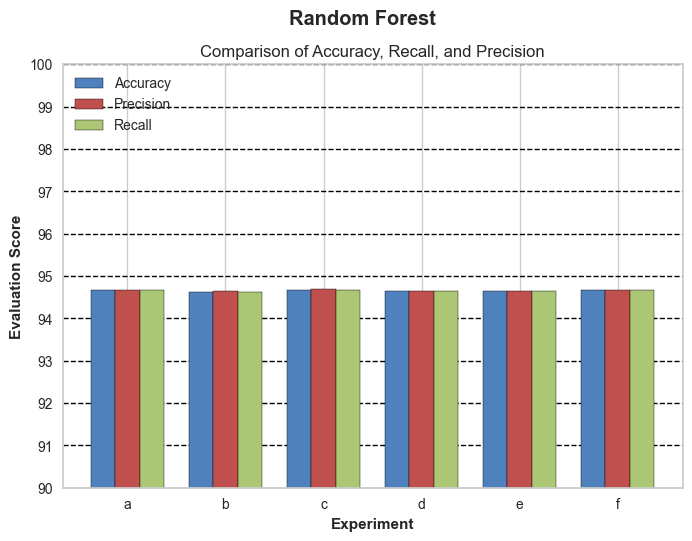

In [78]:
# Dictionary with data
data = experiment_dict_rf

# Importing labels and value
labels = list(data.keys())
accuracy = [data[key]['accuracy'] for key in labels]
recall = [data[key]['recall'] for key in labels]
precision = [data[key]['precision'] for key in labels]

# Bar width
bar_width = 0.25

# Preparing bar position
r1 = range(len(labels))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.grid(axis='y', linestyle='--', zorder=1, color='black')

# Creating bar chart
plt.bar(r1, accuracy, color='#4F81BD', width=bar_width, edgecolor='black', label='Accuracy', zorder=2)
plt.bar(r2, precision, color='#C0504D', width=bar_width, edgecolor='black', label='Precision', zorder=2)
plt.bar(r3, recall, color='#ABC674', width=bar_width, edgecolor='black', label='Recall', zorder=2)

# Adding label into x axis
plt.xlabel('Experiment', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(labels))], labels)

plt.yticks([90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100])

# Adding label into y axis
plt.ylabel('Evaluation Score', fontweight='bold')
plt.ylim(90, 100)


# Adding title
plt.title('Comparison of Accuracy, Recall, and Precision')
plt.suptitle('Random Forest', fontweight='bold')

# Adding legend
plt.legend(loc='upper left')

# Showing plot
plt.show()

### SVM

#### Pembuatan Dictionary untuk Evaluasi Metriks Eksperimen

In [79]:
experiment_dict_svm = {}
eval_dict = {}

#### A. Using Original Data

In [85]:
from pycaret.classification import setup, create_model, plot_model, predict_model, evaluate_model, tune_model, get_config, pull

svm_01 = setup(data= data,
             target = 'Class',
             train_size = 0.8,
             data_split_shuffle = True,
             index = True,
             preprocess = False,
             fold_strategy = 'stratifiedkfold',
             fold_shuffle = True,
             fold = 5,
             session_id = 2024
             )
model_svm_01 = create_model('svm')

,Description,Value
0,Session id,2024
1,Target,Class
2,Target type,Multiclass
3,Original data shape,"(11878, 17)"
4,Transformed data shape,"(11878, 17)"
5,Transformed train set shape,"(9502, 17)"
6,Transformed test set shape,"(2376, 17)"
7,Numeric features,16


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9306,0.0000,0.9306,0.9325,0.9310,0.9158,0.9160
1,0.9427,0.0000,0.9427,0.9435,0.9427,0.9307,0.9308
2,0.9468,0.0000,0.9468,0.9480,0.9471,0.9355,0.9357
3,0.9368,0.0000,0.9368,0.9409,0.9372,0.9237,0.9246
4,0.9363,0.0000,0.9363,0.9377,0.9367,0.9229,0.9230
Mean,0.9386,0.0000,0.9386,0.9405,0.9390,0.9257,0.9260
Std,0.0056,0.0000,0.0056,0.0052,0.0055,0.0068,0.0067


##### Evaluasi Model

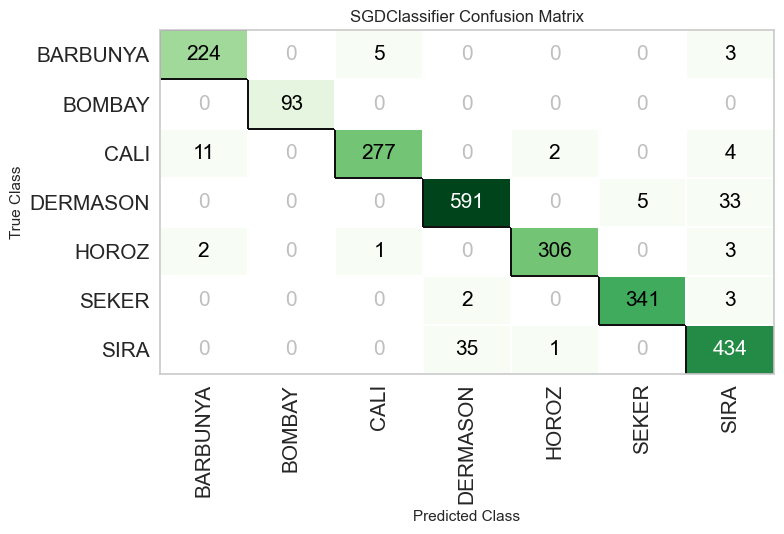

In [86]:
plot_model(model_svm_01, 'confusion_matrix')

In [87]:
evaluate_model(model_svm_01)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [88]:
#Mengambil metriks penilaian model (accuracy, precision, recall)
metrics_svm_01 = pull()
metrics_svm_01

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9306,0.0,0.9306,0.9325,0.9310,0.9158,0.9160
1,0.9427,0.0,0.9427,0.9435,0.9427,0.9307,0.9308
2,0.9468,0.0,0.9468,0.9480,0.9471,0.9355,0.9357
3,0.9368,0.0,0.9368,0.9409,0.9372,0.9237,0.9246
4,0.9363,0.0,0.9363,0.9377,0.9367,0.9229,0.9230
Mean,0.9386,0.0,0.9386,0.9405,0.9390,0.9257,0.9260
Std,0.0056,0.0,0.0056,0.0052,0.0055,0.0068,0.0067


##### Pengumpulan Metriks Evaluasi Eksperimen

In [89]:
accuracy = metrics_svm_01.loc['Mean', 'Accuracy']
precision = metrics_svm_01.loc['Mean', 'Prec.']
recall = metrics_svm_01.loc['Mean', 'Recall']

eval_dict['accuracy'] = accuracy * 100
eval_dict['precision'] = precision * 100
eval_dict['recall'] = recall * 100

experiment_dict_svm['a'] = eval_dict.copy()
experiment_dict_svm

{'a': {'accuracy': 93.86, 'precision': 94.05, 'recall': 93.86}}

#### B. Using Original Data and Optimized Hyperparameters

Proses hyperparameter tuning pada SVM menggunakan Pycaret harus dilakukan secara semi-manual di mana parameter 'kernel' tidak dapat diiterasikan menggunakan skema GridCV karena pemilihan kernel dilakukan secara otomatis oleh Pycaret. Oleh karena itu, untuk eksperimen B pada model SVM, digunakan scikit-learn

In [90]:
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
10200,-0.410449,-0.544842,-0.757552,0.062928,-1.380161,-1.737949,-0.414414,-0.414489,0.151285,0.801661,1.281181,1.565210,-0.302312,1.267565,1.618547,0.708848,SEKER
2851,0.812894,0.996180,1.164704,0.753424,0.795807,0.839390,0.815017,1.010594,-0.020502,-0.496213,-0.481386,-0.893323,-0.988086,-1.141571,-0.899953,-2.204589,CALI
3733,-0.944590,-1.216266,-1.265788,-1.090962,-0.818256,-0.679202,-0.941861,-1.240299,0.926411,-0.620556,0.491383,0.791189,1.610158,1.608842,0.776014,-0.287973,DERMASON
3089,0.960435,1.152938,1.238502,0.948588,0.640995,0.745040,0.974891,1.157225,0.018564,-1.778505,-0.588708,-0.740059,-1.178762,-1.123998,-0.756400,-1.199516,CALI
8173,0.080711,0.360484,0.777731,-0.421339,2.150401,1.437178,0.077465,0.212472,-0.403516,0.341856,-1.283392,-1.852562,0.370698,-1.278292,-1.757791,0.172873,HOROZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5261,-0.723685,-0.918143,-0.938175,-0.731075,-0.681582,-0.484343,-0.722807,-0.874306,-0.567829,-0.109416,0.875808,0.647430,0.873196,0.999661,0.624553,0.677549,DERMASON
11530,-0.402218,-0.440132,-0.442429,-0.339374,-0.299665,-0.026208,-0.397882,-0.403145,-0.714558,-0.917096,0.397000,0.199356,0.250386,0.201515,0.162567,0.033534,SIRA
8675,0.309541,0.642236,0.704367,0.164783,0.945122,0.924009,0.312484,0.476359,-2.395155,-0.598810,-1.441541,-0.991736,-0.394492,-0.990788,-0.991188,-0.931445,HOROZ
12578,-0.241806,-0.152985,-0.160763,-0.221804,0.042763,0.301852,-0.238576,-0.188340,-0.465129,-0.674469,-0.342352,-0.167823,0.092506,-0.197597,-0.204618,-0.503242,SIRA


In [91]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold

params = {  'C': [0.1, 1, 10, 100, 1000],
            'gamma': [1, 0.1, 0.001, 0.00001],
            'degree': [1, 10],
            'kernel': ['poly', 'rbf', 'linear', 'sigmoid']
        }

stratified_cv = StratifiedKFold(n_splits = 5,
                                shuffle = True,
                                random_state = 2024)


grid_svm_02 = GridSearchCV(     SVC(),
                                param_grid = params,
                                refit = True,
                                verbose = 1,
                                cv = stratified_cv
                        )

grid_svm_02.fit(data.iloc[:, :16], data.iloc[:, 16])

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2024, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'degree': [1, 10],
                         'gamma': [1, 0.1, 0.001, 1e-05],
                         'kernel': ['poly', 'rbf', 'linear', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [92]:
svm_best_params = grid_svm_02.best_params_
svm_best_params

{'C': 10, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [93]:
grid_svm_02.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

##### Pengumpulan Metriks Evaluasi Eksperimen

In [94]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

y_pred = grid_svm_02.best_estimator_.predict(data.iloc[:, :16])

accuracy = accuracy_score(data.iloc[:, 16], y_pred) * 100
recall = recall_score(data.iloc[:, 16], y_pred, average = 'macro') * 100
precision = precision_score(data.iloc[:, 16], y_pred, average = 'macro') * 100

eval_dict['accuracy'] = accuracy
eval_dict['recall'] = recall
eval_dict['precision'] = precision
experiment_dict_svm['b'] = eval_dict.copy()

experiment_dict_svm

{'a': {'accuracy': 93.86, 'precision': 94.05, 'recall': 93.86},
 'b': {'accuracy': 95.83263175618791,
  'precision': 96.9091293542574,
  'recall': 96.76664106083061}}

#### C. Using First Eight PCA Components instead of the Original Data

In [95]:
from pycaret.classification import setup, create_model, predict_model, evaluate_model, tune_model, get_config
svm_03 = setup(data = data,
             target = 'Class',
             train_size = 0.8,
             data_split_shuffle = True,
             index = True,
             preprocess = True,
             fold_strategy = 'stratifiedkfold',
             fold_shuffle = True,
             fold = 5,
             session_id = 2024,
             pca = True,
             pca_method = 'linear',
             pca_components = 8
             )

model_svm_03 = create_model('svm')

,Description,Value
0,Session id,2024
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"BARBUNYA: 0, BOMBAY: 1, CALI: 2, DERMASON: 3, HOROZ: 4, SEKER: 5, SIRA: 6"
4,Original data shape,"(11878, 17)"
5,Transformed data shape,"(11878, 9)"
6,Transformed train set shape,"(9502, 9)"
7,Transformed test set shape,"(2376, 9)"
8,Numeric features,16
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9290,0.0000,0.9290,0.9312,0.9295,0.9140,0.9142
1,0.9453,0.0000,0.9453,0.9463,0.9455,0.9338,0.9340
2,0.9489,0.0000,0.9489,0.9499,0.9491,0.9380,0.9382
3,0.9368,0.0000,0.9368,0.9404,0.9373,0.9236,0.9244
4,0.9384,0.0000,0.9384,0.9391,0.9386,0.9254,0.9255
Mean,0.9397,0.0000,0.9397,0.9414,0.9400,0.9270,0.9272
Std,0.0069,0.0000,0.0069,0.0064,0.0068,0.0084,0.0083


##### Evaluasi Model

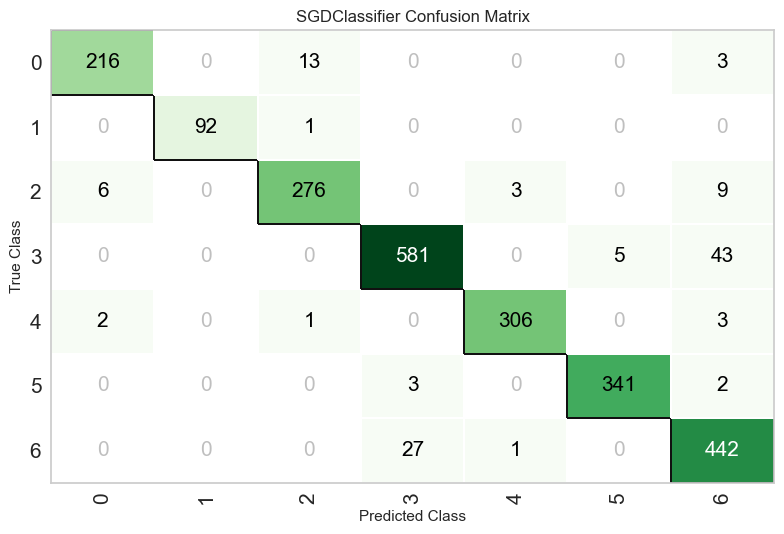

In [96]:
plot_model(model_svm_03, 'confusion_matrix')

In [97]:
evaluate_model(model_svm_03)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [98]:
#Mengambil metriks penilaian model (accuracy, precision, recall)
metrics_svm_03 = pull()
metrics_svm_03

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9290,0.0,0.9290,0.9312,0.9295,0.9140,0.9142
1,0.9453,0.0,0.9453,0.9463,0.9455,0.9338,0.9340
2,0.9489,0.0,0.9489,0.9499,0.9491,0.9380,0.9382
3,0.9368,0.0,0.9368,0.9404,0.9373,0.9236,0.9244
4,0.9384,0.0,0.9384,0.9391,0.9386,0.9254,0.9255
Mean,0.9397,0.0,0.9397,0.9414,0.9400,0.9270,0.9272
Std,0.0069,0.0,0.0069,0.0064,0.0068,0.0084,0.0083


##### Pengumpulan Metriks Evaluasi Eksperimen

In [99]:
accuracy = metrics_svm_03.loc['Mean', 'Accuracy']
precision = metrics_svm_03.loc['Mean', 'Prec.']
recall = metrics_svm_03.loc['Mean', 'Recall']

eval_dict['accuracy'] = accuracy * 100
eval_dict['precision'] = precision * 100
eval_dict['recall'] = recall * 100

experiment_dict_svm['c'] = eval_dict.copy()
experiment_dict_svm

{'a': {'accuracy': 93.86, 'precision': 94.05, 'recall': 93.86},
 'b': {'accuracy': 95.83263175618791,
  'precision': 96.9091293542574,
  'recall': 96.76664106083061},
 'c': {'accuracy': 93.97, 'precision': 94.14, 'recall': 93.97}}

#### D. Applying SMOTE Balancing to the Original Variables

In [100]:
from pycaret.classification import setup, create_model, predict_model, evaluate_model, tune_model, get_config
svm_04 = setup(data = data,
             target = 'Class',
             train_size = 0.8,
             data_split_shuffle = True,
             index = True,
             preprocess = True,
             fold_strategy = 'stratifiedkfold',
             fold_shuffle = True,
             fold = 5,
             session_id = 2024,
             pca = False,
             pca_method = 'linear',
             pca_components = 8,
             fix_imbalance = True,
             fix_imbalance_method = 'SMOTE'
             )

model_svm_04 = create_model('svm')

,Description,Value
0,Session id,2024
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"BARBUNYA: 0, BOMBAY: 1, CALI: 2, DERMASON: 3, HOROZ: 4, SEKER: 5, SIRA: 6"
4,Original data shape,"(11878, 17)"
5,Transformed data shape,"(19995, 17)"
6,Transformed train set shape,"(17619, 17)"
7,Transformed test set shape,"(2376, 17)"
8,Numeric features,16
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9216,0.0000,0.9216,0.9286,0.9225,0.9053,0.9068
1,0.9437,0.0000,0.9437,0.9438,0.9437,0.9318,0.9318
2,0.9468,0.0000,0.9468,0.9483,0.9470,0.9357,0.9359
3,0.9484,0.0000,0.9484,0.9486,0.9484,0.9375,0.9376
4,0.9279,0.0000,0.9279,0.9321,0.9286,0.9128,0.9136
Mean,0.9377,0.0000,0.9377,0.9403,0.9380,0.9246,0.9251
Std,0.0109,0.0000,0.0109,0.0084,0.0105,0.0131,0.0125


##### Evaluasi Model

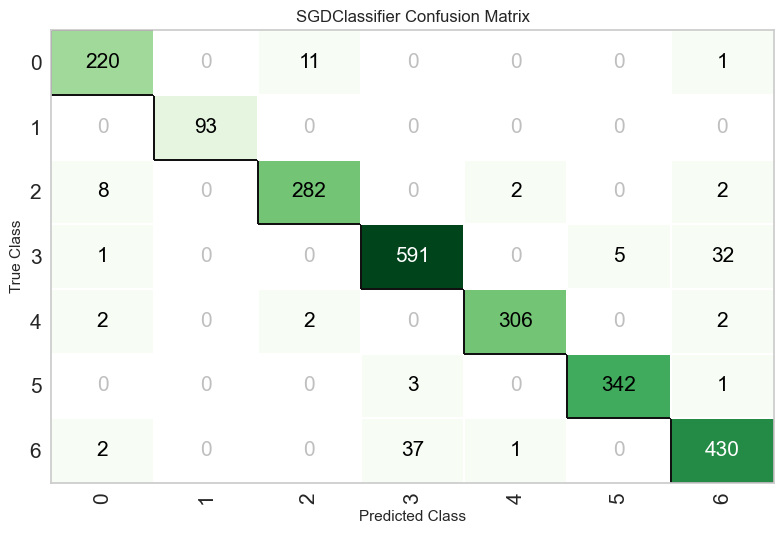

In [101]:
plot_model(model_svm_04, 'confusion_matrix')

In [102]:
evaluate_model(model_svm_04)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [103]:
#Mengambil metriks penilaian model (accuracy, precision, recall)
metrics_svm_04 = pull()
metrics_svm_04

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9216,0.0,0.9216,0.9286,0.9225,0.9053,0.9068
1,0.9437,0.0,0.9437,0.9438,0.9437,0.9318,0.9318
2,0.9468,0.0,0.9468,0.9483,0.9470,0.9357,0.9359
3,0.9484,0.0,0.9484,0.9486,0.9484,0.9375,0.9376
4,0.9279,0.0,0.9279,0.9321,0.9286,0.9128,0.9136
Mean,0.9377,0.0,0.9377,0.9403,0.9380,0.9246,0.9251
Std,0.0109,0.0,0.0109,0.0084,0.0105,0.0131,0.0125


##### Pengumpulan Metriks Evaluasi Eksperimen

In [104]:
accuracy = metrics_svm_04.loc['Mean', 'Accuracy']
precision = metrics_svm_04.loc['Mean', 'Prec.']
recall = metrics_svm_04.loc['Mean', 'Recall']

eval_dict['accuracy'] = accuracy * 100
eval_dict['precision'] = precision * 100
eval_dict['recall'] = recall * 100

experiment_dict_svm['d'] = eval_dict.copy()
experiment_dict_svm

{'a': {'accuracy': 93.86, 'precision': 94.05, 'recall': 93.86},
 'b': {'accuracy': 95.83263175618791,
  'precision': 96.9091293542574,
  'recall': 96.76664106083061},
 'c': {'accuracy': 93.97, 'precision': 94.14, 'recall': 93.97},
 'd': {'accuracy': 93.77, 'precision': 94.03, 'recall': 93.77}}

#### E. Using Original Data, Optimised Hyperparameters, and SMOTE

##### Mendapatkan Best Hyperparameters Berdasarkan Experiment B

In [105]:
svm_best_params = grid_svm_02.best_params_
svm_best_params

{'C': 10, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}

##### Pembuatan Model dan Proses Learning

In [106]:
from pycaret.classification import setup, create_model, predict_model, evaluate_model, tune_model, get_config
svm_05 = setup( data = data,
                target = 'Class',
                train_size = 0.8,
                data_split_shuffle = True,
                index = True,
                preprocess = True,
                fold_strategy = 'stratifiedkfold',
                fold_shuffle = True,
                fold = 5,
                session_id = 2024,
                pca = False,
                pca_method = 'linear',
                pca_components = 8,
                fix_imbalance = True,
                fix_imbalance_method = 'SMOTE'
            )

model_svm_05 = create_model('rbfsvm', 
                            C = svm_best_params['C'],
                            degree = svm_best_params['degree'],
                            gamma = svm_best_params['gamma'])

,Description,Value
0,Session id,2024
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"BARBUNYA: 0, BOMBAY: 1, CALI: 2, DERMASON: 3, HOROZ: 4, SEKER: 5, SIRA: 6"
4,Original data shape,"(11878, 17)"
5,Transformed data shape,"(19995, 17)"
6,Transformed train set shape,"(17619, 17)"
7,Transformed test set shape,"(2376, 17)"
8,Numeric features,16
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9463,0.0000,0.9463,0.9464,0.9463,0.9350,0.9350
1,0.9553,0.0000,0.9553,0.9552,0.9552,0.9459,0.9459
2,0.9558,0.0000,0.9558,0.9562,0.9558,0.9465,0.9466
3,0.9516,0.0000,0.9516,0.9517,0.9515,0.9414,0.9415
4,0.9474,0.0000,0.9474,0.9474,0.9473,0.9363,0.9363
Mean,0.9513,0.0000,0.9513,0.9514,0.9512,0.9410,0.9411
Std,0.0039,0.0000,0.0039,0.0040,0.0039,0.0047,0.0048


##### Evaluasi Model

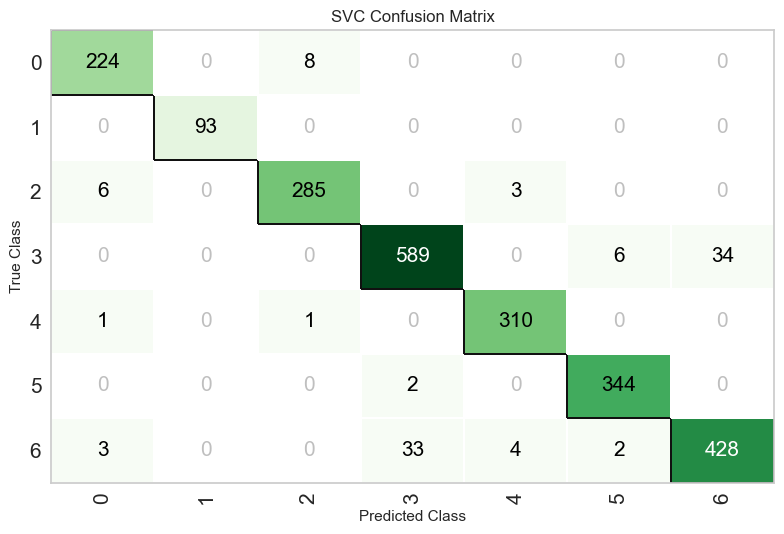

In [107]:
plot_model(model_svm_05, 'confusion_matrix')

In [108]:
evaluate_model(model_svm_05)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [109]:
#Mengambil metriks penilaian model (accuracy, precision, recall)
metrics_svm_05 = pull()
metrics_svm_05

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9463,0.0,0.9463,0.9464,0.9463,0.9350,0.9350
1,0.9553,0.0,0.9553,0.9552,0.9552,0.9459,0.9459
2,0.9558,0.0,0.9558,0.9562,0.9558,0.9465,0.9466
3,0.9516,0.0,0.9516,0.9517,0.9515,0.9414,0.9415
4,0.9474,0.0,0.9474,0.9474,0.9473,0.9363,0.9363
Mean,0.9513,0.0,0.9513,0.9514,0.9512,0.9410,0.9411
Std,0.0039,0.0,0.0039,0.0040,0.0039,0.0047,0.0048


##### Pengumpulan Metriks Evaluasi Eksperimen

In [110]:
accuracy = metrics_svm_05.loc['Mean', 'Accuracy']
precision = metrics_svm_05.loc['Mean', 'Prec.']
recall = metrics_svm_05.loc['Mean', 'Recall']

eval_dict['accuracy'] = accuracy * 100
eval_dict['precision'] = precision * 100
eval_dict['recall'] = recall * 100

experiment_dict_svm['e'] = eval_dict.copy()
experiment_dict_svm

{'a': {'accuracy': 93.86, 'precision': 94.05, 'recall': 93.86},
 'b': {'accuracy': 95.83263175618791,
  'precision': 96.9091293542574,
  'recall': 96.76664106083061},
 'c': {'accuracy': 93.97, 'precision': 94.14, 'recall': 93.97},
 'd': {'accuracy': 93.77, 'precision': 94.03, 'recall': 93.77},
 'e': {'accuracy': 95.13000000000001,
  'precision': 95.14,
  'recall': 95.13000000000001}}

#### F. Using First Eight PCA Components and SMOTE Balancing 

In [111]:
from pycaret.classification import setup, create_model, predict_model, evaluate_model, tune_model, get_config
svm_06 = setup(data = data,
             target = 'Class',
             train_size = 0.8,
             data_split_shuffle = True,
             index = True,
             preprocess = False,
             fold_strategy = 'stratifiedkfold',
             fold_shuffle = True,
             fold = 5,
             session_id = 2024,
             pca = True,
             pca_method = 'linear',
             pca_components = 8,
             fix_imbalance = True,
             fix_imbalance_method = 'SMOTE'
             )

model_svm_06 = create_model('svm')

,Description,Value
0,Session id,2024
1,Target,Class
2,Target type,Multiclass
3,Original data shape,"(11878, 17)"
4,Transformed data shape,"(11878, 17)"
5,Transformed train set shape,"(9502, 17)"
6,Transformed test set shape,"(2376, 17)"
7,Numeric features,16


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9306,0.0000,0.9306,0.9325,0.9310,0.9158,0.9160
1,0.9427,0.0000,0.9427,0.9435,0.9427,0.9307,0.9308
2,0.9468,0.0000,0.9468,0.9480,0.9471,0.9355,0.9357
3,0.9368,0.0000,0.9368,0.9409,0.9372,0.9237,0.9246
4,0.9363,0.0000,0.9363,0.9377,0.9367,0.9229,0.9230
Mean,0.9386,0.0000,0.9386,0.9405,0.9390,0.9257,0.9260
Std,0.0056,0.0000,0.0056,0.0052,0.0055,0.0068,0.0067


##### Evaluasi Model

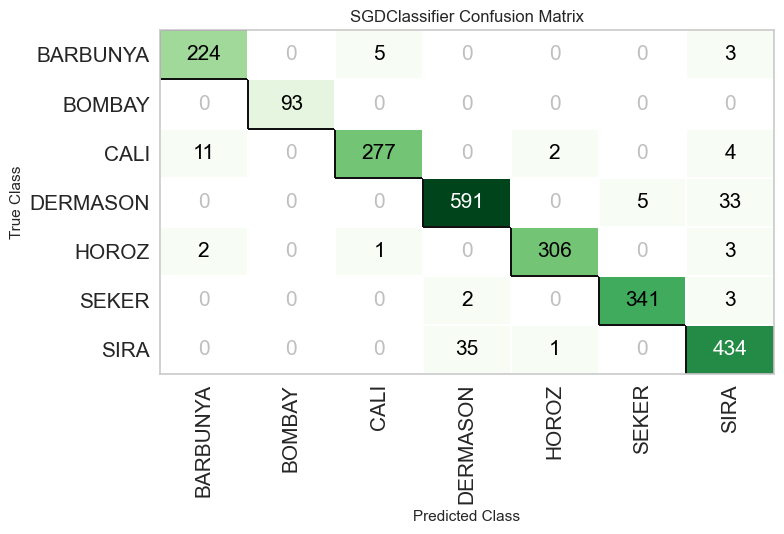

In [112]:
plot_model(model_svm_06, 'confusion_matrix')

In [114]:
evaluate_model(model_svm_06)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [115]:
#Mengambil metriks penilaian model (accuracy, precision, recall)
metrics_svm_06 = pull()
metrics_svm_06

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9306,0.0,0.9306,0.9325,0.9310,0.9158,0.9160
1,0.9427,0.0,0.9427,0.9435,0.9427,0.9307,0.9308
2,0.9468,0.0,0.9468,0.9480,0.9471,0.9355,0.9357
3,0.9368,0.0,0.9368,0.9409,0.9372,0.9237,0.9246
4,0.9363,0.0,0.9363,0.9377,0.9367,0.9229,0.9230
Mean,0.9386,0.0,0.9386,0.9405,0.9390,0.9257,0.9260
Std,0.0056,0.0,0.0056,0.0052,0.0055,0.0068,0.0067


##### Pengumpulan Metriks Evaluasi Eksperimen

In [116]:
accuracy = metrics_svm_06.loc['Mean', 'Accuracy']
precision = metrics_svm_06.loc['Mean', 'Prec.']
recall = metrics_svm_06.loc['Mean', 'Recall']

eval_dict['accuracy'] = accuracy * 100
eval_dict['precision'] = precision * 100
eval_dict['recall'] = recall * 100

experiment_dict_svm['f'] = eval_dict.copy()
experiment_dict_svm

{'a': {'accuracy': 93.86, 'precision': 94.05, 'recall': 93.86},
 'b': {'accuracy': 95.83263175618791,
  'precision': 96.9091293542574,
  'recall': 96.76664106083061},
 'c': {'accuracy': 93.97, 'precision': 94.14, 'recall': 93.97},
 'd': {'accuracy': 93.77, 'precision': 94.03, 'recall': 93.77},
 'e': {'accuracy': 95.13000000000001,
  'precision': 95.14,
  'recall': 95.13000000000001},
 'f': {'accuracy': 93.86, 'precision': 94.05, 'recall': 93.86}}

#### Visualisasi Metriks Evaluasi Semua Eksperimen

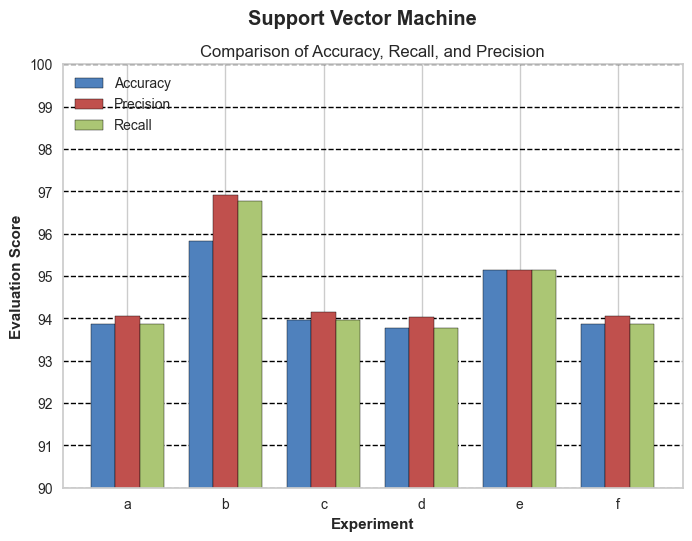

In [117]:
# Dictionary with data
data_eval = experiment_dict_svm

# Importing labels and value
labels = list(data_eval.keys())
accuracy = [data_eval[key]['accuracy'] for key in labels]
recall = [data_eval[key]['recall'] for key in labels]
precision = [data_eval[key]['precision'] for key in labels]

# Bar width
bar_width = 0.25

# Preparing bar position
r1 = range(len(labels))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.grid(axis='y', linestyle='--', zorder=1, color='black')

# Creating bar chart
plt.bar(r1, accuracy, color='#4F81BD', width=bar_width, edgecolor='black', label='Accuracy', zorder=2)
plt.bar(r2, precision, color='#C0504D', width=bar_width, edgecolor='black', label='Precision', zorder=2)
plt.bar(r3, recall, color='#ABC674', width=bar_width, edgecolor='black', label='Recall', zorder=2)

# Adding label into x axis
plt.xlabel('Experiment', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(labels))], labels)

plt.yticks([90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100])

# Adding label into y axis
plt.ylabel('Evaluation Score', fontweight='bold')
plt.ylim(90, 100)


# Adding title
plt.title('Comparison of Accuracy, Recall, and Precision')
plt.suptitle('Support Vector Machine', fontweight='bold')

# Adding legend
plt.legend(loc='upper left')

# Showing plot
plt.show()

### K-Nearest_Neighbors

#### Pembuatan Dictionary untuk Evaluasi Metriks Eksperimen

In [118]:
experiment_dict_knn = {}
eval_dict = {}

#### A. Using original data

In [119]:
from pycaret.classification import setup, create_model, predict_model, evaluate_model, tune_model, get_config
knn_01 = setup(data= data,
             target = 'Class',
             train_size = 0.8,
             data_split_shuffle = True,
             index = True,
             preprocess = False,
             fold_strategy = 'stratifiedkfold',
             fold_shuffle = True,
             fold = 5,
             session_id = 2024
             )
model_knn_01 = create_model('knn')

,Description,Value
0,Session id,2024
1,Target,Class
2,Target type,Multiclass
3,Original data shape,"(11878, 17)"
4,Transformed data shape,"(11878, 17)"
5,Transformed train set shape,"(9502, 17)"
6,Transformed test set shape,"(2376, 17)"
7,Numeric features,16


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9385,0.9883,0.9385,0.9389,0.9385,0.9254,0.9255
1,0.9506,0.9923,0.9506,0.9508,0.9505,0.9401,0.9401
2,0.9432,0.9915,0.9432,0.9437,0.9432,0.9311,0.9312
3,0.9484,0.9905,0.9484,0.9486,0.9484,0.9375,0.9375
4,0.9405,0.9884,0.9405,0.9411,0.9405,0.9279,0.9280
Mean,0.9442,0.9902,0.9442,0.9446,0.9442,0.9324,0.9325
Std,0.0046,0.0016,0.0046,0.0045,0.0046,0.0056,0.0056


##### Evaluasi Model

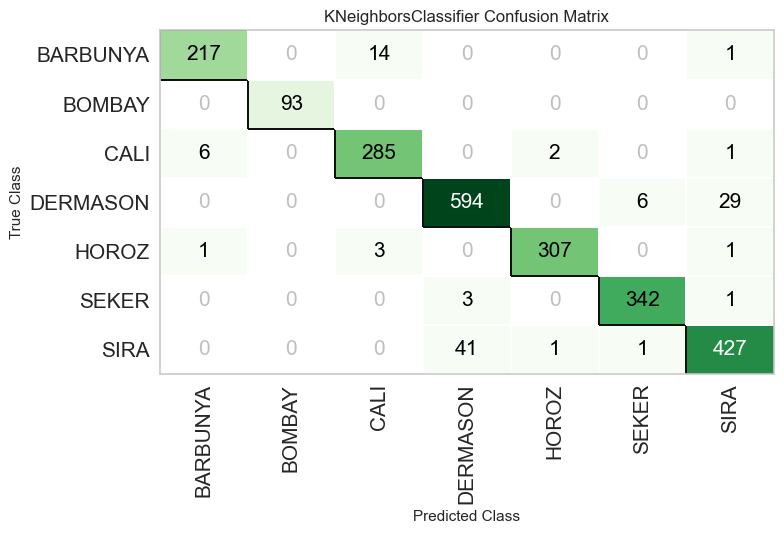

In [120]:
plot_model(model_knn_01, 'confusion_matrix')

In [121]:
evaluate_model(model_knn_01)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [122]:
#Mengambil metriks penilaian model (accuracy, precision, recall)
metrics_knn_01 = pull()
metrics_knn_01

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9385,0.9883,0.9385,0.9389,0.9385,0.9254,0.9255
1,0.9506,0.9923,0.9506,0.9508,0.9505,0.9401,0.9401
2,0.9432,0.9915,0.9432,0.9437,0.9432,0.9311,0.9312
3,0.9484,0.9905,0.9484,0.9486,0.9484,0.9375,0.9375
4,0.9405,0.9884,0.9405,0.9411,0.9405,0.9279,0.9280
Mean,0.9442,0.9902,0.9442,0.9446,0.9442,0.9324,0.9325
Std,0.0046,0.0016,0.0046,0.0045,0.0046,0.0056,0.0056


##### Pengumpulan Metriks Evaluasi Eksperimen

In [123]:
accuracy = metrics_knn_01.loc['Mean', 'Accuracy']
precision = metrics_knn_01.loc['Mean', 'Prec.']
recall = metrics_knn_01.loc['Mean', 'Recall']

eval_dict['accuracy'] = accuracy * 100
eval_dict['precision'] = precision * 100
eval_dict['recall'] = recall * 100

experiment_dict_knn['a'] = eval_dict.copy()
experiment_dict_knn

{'a': {'accuracy': 94.42, 'precision': 94.46, 'recall': 94.42}}

#### B. Using Original Data and Optimized Hyperparameters

In [124]:
from pycaret.classification import setup, create_model, predict_model, evaluate_model, tune_model, get_config
knn_02 = setup(data = data,
             target = 'Class',
             train_size = 0.8,
             data_split_shuffle = True,
             index = True,
             preprocess = False,
             fold_strategy = 'stratifiedkfold',
             fold_shuffle = True,
             fold = 5,
             session_id = 2024
             )

model_knn_02 = create_model('knn')

params = {  'n_neighbors': [*np.arange(1, 31)],
            'leaf_size': [*np.arange(1, 51)],
        }
tuned_knn_02 = tune_model(model_knn_02, custom_grid = params)

,Description,Value
0,Session id,2024
1,Target,Class
2,Target type,Multiclass
3,Original data shape,"(11878, 17)"
4,Transformed data shape,"(11878, 17)"
5,Transformed train set shape,"(9502, 17)"
6,Transformed test set shape,"(2376, 17)"
7,Numeric features,16


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9385,0.9883,0.9385,0.9389,0.9385,0.9254,0.9255
1,0.9506,0.9923,0.9506,0.9508,0.9505,0.9401,0.9401
2,0.9432,0.9915,0.9432,0.9437,0.9432,0.9311,0.9312
3,0.9484,0.9905,0.9484,0.9486,0.9484,0.9375,0.9375
4,0.9405,0.9884,0.9405,0.9411,0.9405,0.9279,0.9280
Mean,0.9442,0.9902,0.9442,0.9446,0.9442,0.9324,0.9325
Std,0.0046,0.0016,0.0046,0.0045,0.0046,0.0056,0.0056


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9379,0.9950,0.9379,0.9388,0.9381,0.9248,0.9248
1,0.9527,0.9967,0.9527,0.9531,0.9527,0.9426,0.9427
2,0.9516,0.9969,0.9516,0.9525,0.9516,0.9413,0.9414
3,0.9500,0.9969,0.9500,0.9502,0.9500,0.9395,0.9395
4,0.9411,0.9952,0.9411,0.9419,0.9412,0.9285,0.9286
Mean,0.9466,0.9961,0.9466,0.9473,0.9467,0.9353,0.9354
Std,0.0060,0.0009,0.0060,0.0059,0.0059,0.0073,0.0073


Fitting 5 folds for each of 10 candidates, totalling 50 fits


##### Evaluasi Model

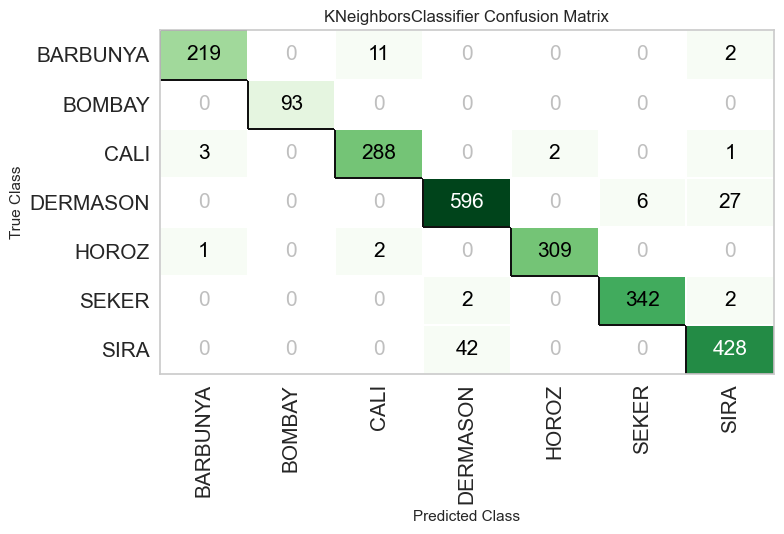

In [125]:
plot_model(tuned_knn_02, 'confusion_matrix')

In [126]:
evaluate_model(tuned_knn_02)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [127]:
#Mengambil metriks penilaian model (accuracy, precision, recall)
metrics_knn_02 = pull()
metrics_knn_02

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9379,0.9950,0.9379,0.9388,0.9381,0.9248,0.9248
1,0.9527,0.9967,0.9527,0.9531,0.9527,0.9426,0.9427
2,0.9516,0.9969,0.9516,0.9525,0.9516,0.9413,0.9414
3,0.9500,0.9969,0.9500,0.9502,0.9500,0.9395,0.9395
4,0.9411,0.9952,0.9411,0.9419,0.9412,0.9285,0.9286
Mean,0.9466,0.9961,0.9466,0.9473,0.9467,0.9353,0.9354
Std,0.0060,0.0009,0.0060,0.0059,0.0059,0.0073,0.0073


##### Pengumpulan Metriks Evaluasi Eksperimen

In [128]:
accuracy = metrics_knn_02.loc['Mean', 'Accuracy']
precision = metrics_knn_02.loc['Mean', 'Prec.']
recall = metrics_knn_02.loc['Mean', 'Recall']

eval_dict['accuracy'] = accuracy * 100
eval_dict['precision'] = precision * 100
eval_dict['recall'] = recall * 100

experiment_dict_knn['b'] = eval_dict.copy()
experiment_dict_knn

{'a': {'accuracy': 94.42, 'precision': 94.46, 'recall': 94.42},
 'b': {'accuracy': 94.66, 'precision': 94.73, 'recall': 94.66}}

#### C. Using First Eight PCA Components instead of the Original Data

In [129]:
from pycaret.classification import setup, create_model, predict_model, evaluate_model, tune_model, get_config
knn_03 = setup(data = data,
             target = 'Class',
             train_size = 0.8,
             data_split_shuffle = True,
             index = True,
             preprocess = True,
             fold_strategy = 'stratifiedkfold',
             fold_shuffle = True,
             fold = 5,
             session_id = 2024,
             pca = True,
             pca_method = 'linear',
             pca_components = 8
             )

model_knn_03 = create_model('knn')

,Description,Value
0,Session id,2024
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"BARBUNYA: 0, BOMBAY: 1, CALI: 2, DERMASON: 3, HOROZ: 4, SEKER: 5, SIRA: 6"
4,Original data shape,"(11878, 17)"
5,Transformed data shape,"(11878, 9)"
6,Transformed train set shape,"(9502, 9)"
7,Transformed test set shape,"(2376, 9)"
8,Numeric features,16
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9385,0.0000,0.9385,0.9389,0.9385,0.9254,0.9255
1,0.9506,0.0000,0.9506,0.9508,0.9505,0.9401,0.9401
2,0.9432,0.0000,0.9432,0.9437,0.9432,0.9311,0.9312
3,0.9484,0.0000,0.9484,0.9486,0.9484,0.9375,0.9375
4,0.9405,0.0000,0.9405,0.9411,0.9405,0.9279,0.9280
Mean,0.9442,0.0000,0.9442,0.9446,0.9442,0.9324,0.9325
Std,0.0046,0.0000,0.0046,0.0045,0.0046,0.0056,0.0056


##### Evaluasi Model

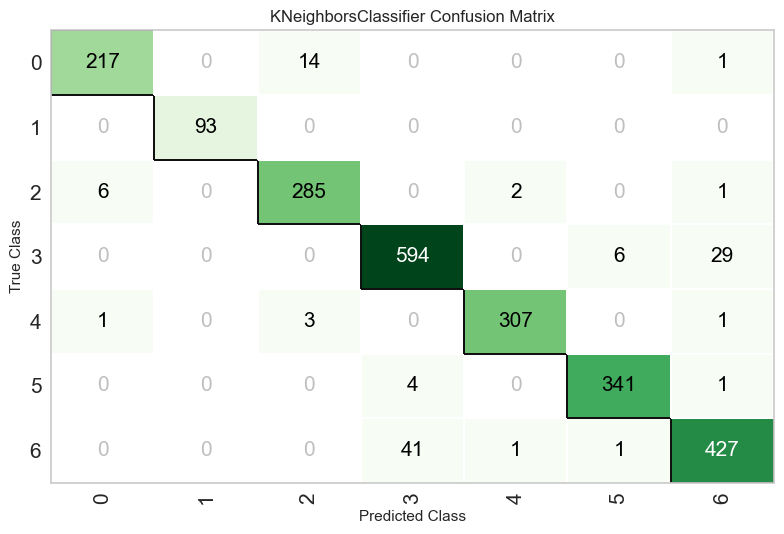

In [130]:
plot_model(model_knn_03, 'confusion_matrix')

In [131]:
evaluate_model(model_knn_03)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [132]:
#Mengambil metriks penilaian model (accuracy, precision, recall)
metrics_knn_03 = pull()
metrics_knn_03

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9385,0.0,0.9385,0.9389,0.9385,0.9254,0.9255
1,0.9506,0.0,0.9506,0.9508,0.9505,0.9401,0.9401
2,0.9432,0.0,0.9432,0.9437,0.9432,0.9311,0.9312
3,0.9484,0.0,0.9484,0.9486,0.9484,0.9375,0.9375
4,0.9405,0.0,0.9405,0.9411,0.9405,0.9279,0.9280
Mean,0.9442,0.0,0.9442,0.9446,0.9442,0.9324,0.9325
Std,0.0046,0.0,0.0046,0.0045,0.0046,0.0056,0.0056


##### Pengumpulan Metriks Evaluasi Eksperimen

In [133]:
accuracy = metrics_knn_03.loc['Mean', 'Accuracy']
precision = metrics_knn_03.loc['Mean', 'Prec.']
recall = metrics_knn_03.loc['Mean', 'Recall']

eval_dict['accuracy'] = accuracy * 100
eval_dict['precision'] = precision * 100
eval_dict['recall'] = recall * 100

experiment_dict_knn['c'] = eval_dict.copy()
experiment_dict_knn

{'a': {'accuracy': 94.42, 'precision': 94.46, 'recall': 94.42},
 'b': {'accuracy': 94.66, 'precision': 94.73, 'recall': 94.66},
 'c': {'accuracy': 94.42, 'precision': 94.46, 'recall': 94.42}}

#### D. Applying SMOTE Balancing to the Original Variables

In [134]:
from pycaret.classification import setup, create_model, predict_model, evaluate_model, tune_model, get_config
knn_04 = setup(data = data,
             target = 'Class',
             train_size = 0.8,
             data_split_shuffle = True,
             index = True,
             preprocess = True,
             fold_strategy = 'stratifiedkfold',
             fold_shuffle = True,
             fold = 5,
             session_id = 2024,
             pca = False,
             pca_method = 'linear',
             pca_components = 8,
             fix_imbalance = True,
             fix_imbalance_method = 'SMOTE'
             )

model_knn_04 = create_model('knn')

,Description,Value
0,Session id,2024
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"BARBUNYA: 0, BOMBAY: 1, CALI: 2, DERMASON: 3, HOROZ: 4, SEKER: 5, SIRA: 6"
4,Original data shape,"(11878, 17)"
5,Transformed data shape,"(19995, 17)"
6,Transformed train set shape,"(17619, 17)"
7,Transformed test set shape,"(2376, 17)"
8,Numeric features,16
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9358,0.0000,0.9358,0.9363,0.9359,0.9223,0.9224
1,0.9442,0.0000,0.9442,0.9445,0.9443,0.9325,0.9325
2,0.9368,0.0000,0.9368,0.9375,0.9369,0.9236,0.9237
3,0.9447,0.0000,0.9447,0.9448,0.9447,0.9331,0.9332
4,0.9400,0.0000,0.9400,0.9400,0.9400,0.9273,0.9273
Mean,0.9403,0.0000,0.9403,0.9406,0.9404,0.9278,0.9278
Std,0.0037,0.0000,0.0037,0.0035,0.0036,0.0044,0.0044


##### Evaluasi Model

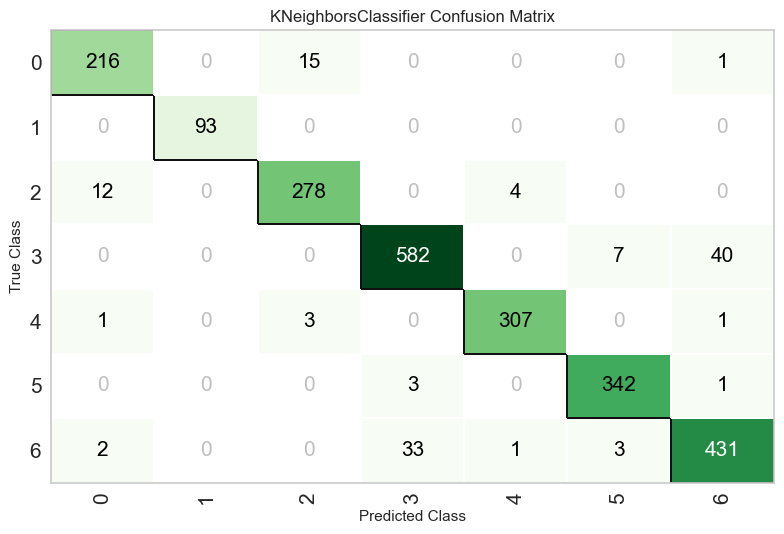

In [135]:
plot_model(model_knn_04, 'confusion_matrix')

In [136]:
evaluate_model(model_knn_04)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [137]:
#Mengambil metriks penilaian model (accuracy, precision, recall)
metrics_knn_04 = pull()
metrics_knn_04

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9358,0.0,0.9358,0.9363,0.9359,0.9223,0.9224
1,0.9442,0.0,0.9442,0.9445,0.9443,0.9325,0.9325
2,0.9368,0.0,0.9368,0.9375,0.9369,0.9236,0.9237
3,0.9447,0.0,0.9447,0.9448,0.9447,0.9331,0.9332
4,0.9400,0.0,0.9400,0.9400,0.9400,0.9273,0.9273
Mean,0.9403,0.0,0.9403,0.9406,0.9404,0.9278,0.9278
Std,0.0037,0.0,0.0037,0.0035,0.0036,0.0044,0.0044


##### Pengumpulan Metriks Evaluasi Eksperimen

In [138]:
accuracy = metrics_knn_04.loc['Mean', 'Accuracy']
precision = metrics_knn_04.loc['Mean', 'Prec.']
recall = metrics_knn_04.loc['Mean', 'Recall']

eval_dict['accuracy'] = accuracy * 100
eval_dict['precision'] = precision * 100
eval_dict['recall'] = recall * 100

experiment_dict_knn['d'] = eval_dict.copy()
experiment_dict_knn

{'a': {'accuracy': 94.42, 'precision': 94.46, 'recall': 94.42},
 'b': {'accuracy': 94.66, 'precision': 94.73, 'recall': 94.66},
 'c': {'accuracy': 94.42, 'precision': 94.46, 'recall': 94.42},
 'd': {'accuracy': 94.03, 'precision': 94.06, 'recall': 94.03}}

#### E. Using Original Data, Optimised Hyperparameters, and SMOTE

##### Mendapatkan Best Hyperparameters Berdasarkan Experiment B

In [139]:
best_params_ = tuned_knn_02.get_params()
best_params_

{'algorithm': 'auto',
 'leaf_size': 11,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 23,
 'p': 2,
 'weights': 'uniform'}

##### Pembuatan Model dan Proses Learning

In [140]:
from pycaret.classification import setup, create_model, predict_model, evaluate_model, tune_model, get_config
knn_05 = setup(data = data,
             target = 'Class',
             train_size = 0.8,
             data_split_shuffle = True,
             index = True,
             preprocess = True,
             fold_strategy = 'stratifiedkfold',
             fold_shuffle = True,
             fold = 5,
             session_id = 2024,
             pca = False,
             pca_method = 'linear',
             pca_components = 8,
             fix_imbalance = True,
             fix_imbalance_method = 'SMOTE'
             )

model_knn_05 = create_model('knn', leaf_size = best_params_['leaf_size'], n_neighbors = best_params_['n_neighbors'])

,Description,Value
0,Session id,2024
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"BARBUNYA: 0, BOMBAY: 1, CALI: 2, DERMASON: 3, HOROZ: 4, SEKER: 5, SIRA: 6"
4,Original data shape,"(11878, 17)"
5,Transformed data shape,"(19995, 17)"
6,Transformed train set shape,"(17619, 17)"
7,Transformed test set shape,"(2376, 17)"
8,Numeric features,16
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9390,0.0000,0.9390,0.9396,0.9390,0.9261,0.9263
1,0.9537,0.0000,0.9537,0.9540,0.9537,0.9440,0.9440
2,0.9479,0.0000,0.9479,0.9492,0.9479,0.9370,0.9373
3,0.9458,0.0000,0.9458,0.9465,0.9458,0.9344,0.9346
4,0.9416,0.0000,0.9416,0.9419,0.9417,0.9292,0.9293
Mean,0.9456,0.0000,0.9456,0.9463,0.9456,0.9342,0.9343
Std,0.0051,0.0000,0.0051,0.0051,0.0051,0.0062,0.0062


##### Evaluasi Model

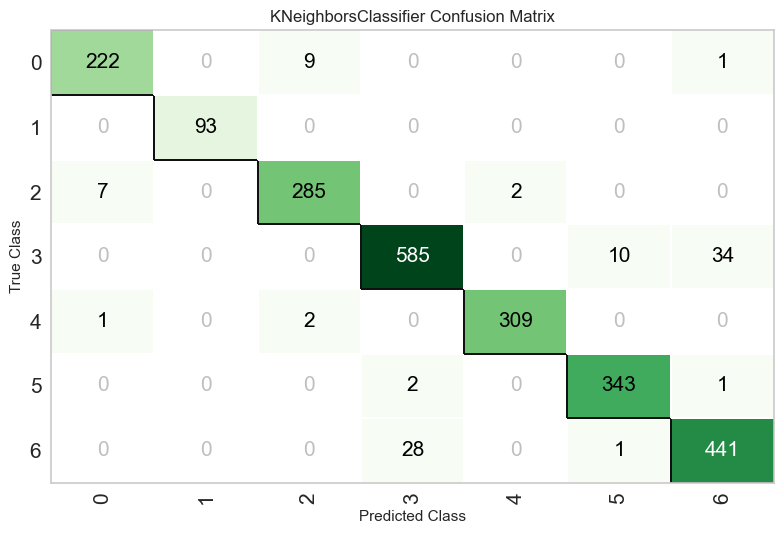

In [141]:
plot_model(model_knn_05, 'confusion_matrix')

In [142]:
evaluate_model(model_knn_05)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [143]:
#Mengambil metriks penilaian model (accuracy, precision, recall)
metrics_knn_05 = pull()
metrics_knn_05

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9390,0.0,0.9390,0.9396,0.9390,0.9261,0.9263
1,0.9537,0.0,0.9537,0.9540,0.9537,0.9440,0.9440
2,0.9479,0.0,0.9479,0.9492,0.9479,0.9370,0.9373
3,0.9458,0.0,0.9458,0.9465,0.9458,0.9344,0.9346
4,0.9416,0.0,0.9416,0.9419,0.9417,0.9292,0.9293
Mean,0.9456,0.0,0.9456,0.9463,0.9456,0.9342,0.9343
Std,0.0051,0.0,0.0051,0.0051,0.0051,0.0062,0.0062


##### Pengumpulan Metriks Evaluasi Eksperimen

In [144]:
accuracy = metrics_knn_05.loc['Mean', 'Accuracy']
precision = metrics_knn_05.loc['Mean', 'Prec.']
recall = metrics_knn_05.loc['Mean', 'Recall']

eval_dict['accuracy'] = accuracy * 100
eval_dict['precision'] = precision * 100
eval_dict['recall'] = recall * 100

experiment_dict_knn['e'] = eval_dict.copy()
experiment_dict_knn

{'a': {'accuracy': 94.42, 'precision': 94.46, 'recall': 94.42},
 'b': {'accuracy': 94.66, 'precision': 94.73, 'recall': 94.66},
 'c': {'accuracy': 94.42, 'precision': 94.46, 'recall': 94.42},
 'd': {'accuracy': 94.03, 'precision': 94.06, 'recall': 94.03},
 'e': {'accuracy': 94.56, 'precision': 94.63000000000001, 'recall': 94.56}}

#### F. Using First Eight PCA Components and SMOTE Balancing 

In [145]:
from pycaret.classification import setup, create_model, predict_model, evaluate_model, tune_model, get_config
knn_06 = setup(data = data,
             target = 'Class',
             train_size = 0.8,
             data_split_shuffle = True,
             index = True,
             preprocess = True,
             fold_strategy = 'stratifiedkfold',
             fold_shuffle = True,
             fold = 5,
             session_id = 2024,
             pca = True,
             pca_method = 'linear',
             pca_components = 8,
             fix_imbalance = True,
             fix_imbalance_method = 'SMOTE'
             )

model_knn_06 = create_model('knn')

,Description,Value
0,Session id,2024
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"BARBUNYA: 0, BOMBAY: 1, CALI: 2, DERMASON: 3, HOROZ: 4, SEKER: 5, SIRA: 6"
4,Original data shape,"(11878, 17)"
5,Transformed data shape,"(19995, 9)"
6,Transformed train set shape,"(17619, 9)"
7,Transformed test set shape,"(2376, 9)"
8,Numeric features,16
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9358,0.0000,0.9358,0.9363,0.9359,0.9223,0.9224
1,0.9448,0.0000,0.9448,0.9450,0.9448,0.9331,0.9332
2,0.9368,0.0000,0.9368,0.9375,0.9369,0.9236,0.9237
3,0.9447,0.0000,0.9447,0.9448,0.9447,0.9331,0.9332
4,0.9400,0.0000,0.9400,0.9400,0.9400,0.9273,0.9273
Mean,0.9404,0.0000,0.9404,0.9407,0.9405,0.9279,0.9280
Std,0.0038,0.0000,0.0038,0.0036,0.0038,0.0046,0.0046


##### Evaluasi Model

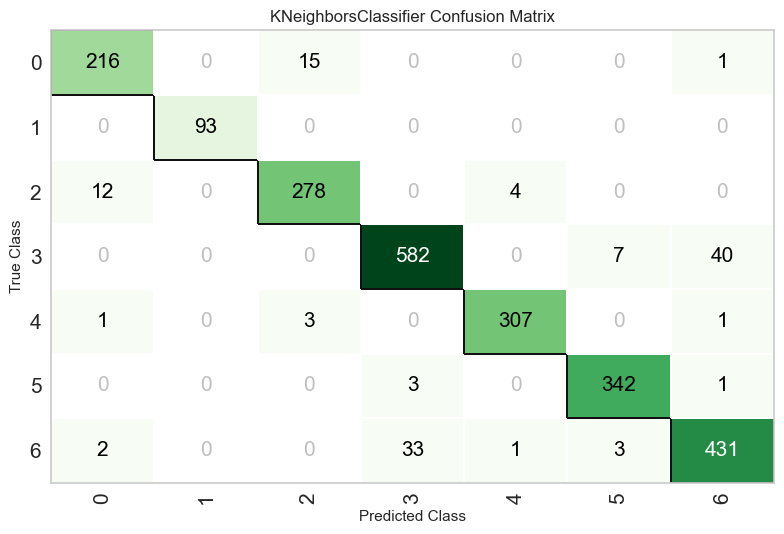

In [146]:
plot_model(model_knn_06, 'confusion_matrix')

In [147]:
evaluate_model(model_knn_06)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [148]:
#Mengambil metriks penilaian model (accuracy, precision, recall)
metrics_knn_06 = pull()
metrics_knn_06

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9358,0.0,0.9358,0.9363,0.9359,0.9223,0.9224
1,0.9448,0.0,0.9448,0.9450,0.9448,0.9331,0.9332
2,0.9368,0.0,0.9368,0.9375,0.9369,0.9236,0.9237
3,0.9447,0.0,0.9447,0.9448,0.9447,0.9331,0.9332
4,0.9400,0.0,0.9400,0.9400,0.9400,0.9273,0.9273
Mean,0.9404,0.0,0.9404,0.9407,0.9405,0.9279,0.9280
Std,0.0038,0.0,0.0038,0.0036,0.0038,0.0046,0.0046


##### Pengumpulan Metriks Evaluasi Eksperimen

In [149]:
accuracy = metrics_knn_06.loc['Mean', 'Accuracy']
precision = metrics_knn_06.loc['Mean', 'Prec.']
recall = metrics_knn_06.loc['Mean', 'Recall']

eval_dict['accuracy'] = accuracy * 100
eval_dict['precision'] = precision * 100
eval_dict['recall'] = recall * 100

experiment_dict_knn['f'] = eval_dict.copy()
experiment_dict_knn

{'a': {'accuracy': 94.42, 'precision': 94.46, 'recall': 94.42},
 'b': {'accuracy': 94.66, 'precision': 94.73, 'recall': 94.66},
 'c': {'accuracy': 94.42, 'precision': 94.46, 'recall': 94.42},
 'd': {'accuracy': 94.03, 'precision': 94.06, 'recall': 94.03},
 'e': {'accuracy': 94.56, 'precision': 94.63000000000001, 'recall': 94.56},
 'f': {'accuracy': 94.04, 'precision': 94.07, 'recall': 94.04}}

#### Visualisasi Metriks Evaluasi Semua Eksperimen

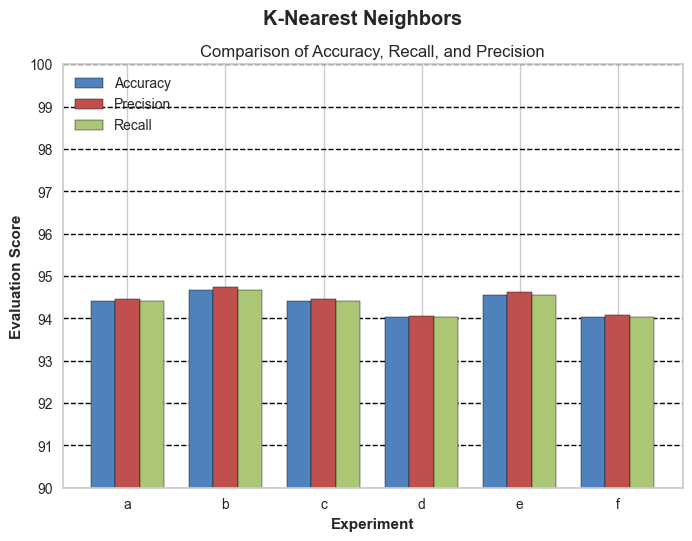

In [150]:
# Dictionary with data
data = experiment_dict_knn

# Importing labels and value
labels = list(data.keys())
accuracy = [data[key]['accuracy'] for key in labels]
recall = [data[key]['recall'] for key in labels]
precision = [data[key]['precision'] for key in labels]

# Bar width
bar_width = 0.25

# Preparing bar position
r1 = range(len(labels))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.grid(axis='y', linestyle='--', zorder=1, color='black')

# Creating bar chart
plt.bar(r1, accuracy, color='#4F81BD', width=bar_width, edgecolor='black', label='Accuracy', zorder=2)
plt.bar(r2, precision, color='#C0504D', width=bar_width, edgecolor='black', label='Precision', zorder=2)
plt.bar(r3, recall, color='#ABC674', width=bar_width, edgecolor='black', label='Recall', zorder=2)

# Adding label into x axis
plt.xlabel('Experiment', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(labels))], labels)

plt.yticks([90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100])

# Adding label into y axis
plt.ylabel('Evaluation Score', fontweight='bold')
plt.ylim(90, 100)


# Adding title
plt.title('Comparison of Accuracy, Recall, and Precision')
plt.suptitle('K-Nearest Neighbors', fontweight='bold')

# Adding legend
plt.legend(loc='upper left')

# Showing plot
plt.show()